# UCCD2063 AIT Assignment (Group 9)
## Lecturer: Dr.Ng Hui Fuang 

### Table of Content
2. [SECTION 2.0: Method](#2.0-Method)
    1. [SECTION 2.1: Data Description](#2.1-Data-Description)
    2. [SECTION 2.2: Data Exploration & Data Visualisation](#2.2-Data-Exploration-and-Visualisation)
        1. [2.2.1: Data Exploration for Numerical Data](#2.2.1-Data-Exploration-for-Numerical-Data)
        2. [2.2.2: Data Exploration for Categorical Data](#2.2.2-Data-Exploration-for-Categorical-Data)
        3. [2.2.3: Scatter Matrix](#2.2.3-Scatter-Matrix)
        4. [2.2.4: Check on distribution of 'stopBy(y)'](#2.2.4-Check-on-distribution-of-'stopBy(y)')
    3. [SECTION 2.3: Data Pre-processing](#2.3-Data-PreProcessing)
        1. [2.3.1: Check for null values](#2.3.1-Check-for-null-values)
        2. [2.3.2: Handling of Duplicated Values](#2.3.2-Handling-of-Duplicated-Values)
        3. [2.3.3: Split Data into Train set and Test set](#2.3.3-Split-Data-into-Train-set-and-Test-set)
        4. [2.3.4: Preprocessing Train Set](#2.3.4-Preprocessing-Train-Set)
        5. [2.3.5: Preprocessing Test Set](#2.3.5-Preprocessing-Test-Set)
    4. [SECTION 2.4: Model Training, Validation, Fine Tuning & Testing](#2.4-Model-Training-and-Validation)
        1. [2.4.1: Random Forest Classifier WITHOUT SMOTE-based technique](#2.4.1-Random-Forest-Classifier-WITHOUT-SMOTE-based-technique)
        2. [2.4.2: Random Forest Classifier WITH SMOTE Technique](#2.4.2-Random-Forest-Classifier-WITH-SMOTE-Technique)
        3. [2.4.3: SGD Classifier WITHOUT SMOTE Technique](#2.4.3-SGD-Classifier-WITHOUT-SMOTE-Technique)
        4. [2.4.4: SGD Classifier WITH SMOTE Technique](#2.4.4-SGD-Classifier-WITH-SMOTE-Technique)
        5. [2.4.5: Logistic Regression Classifier WITHOUT SMOTE Technique](#2.4.5-Logistic-Regression-Classifier-WITHOUT-SMOTE-Technique)
        6. [2.4.6: Logistic Regression Classifier WITH SMOTE Technique](#2.4.6-Logistic-Regression-Classifier-WITH-SMOTE-Technique)
        7. [2.4.7: XGBoost Classifier WITHOUT SMOTE Technique](#2.4.7-XGBoost-Classifier-WITHOUT-SMOTE-Technique)
        8. [2.4.8: XGBoost Classifier WITH SMOTE Technique](#2.4.8-XGBoost-Classifier-WITH-SMOTE-Technique)
        9. [2.4.9: K-Nearest Neighbour WITHOUT SMOTE Technique](#2.4.9-K-Nearest-Neighbour-WITHOUT-SMOTE-Technique)
        10. [2.4.10: K-Nearest Neighbout WITH SMOTE Technique](#2.4.10-K-Nearest-Neighbout-WITH-SMOTE-Technique)       

In [796]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Data Description

#### Load the dataset into variable assign

In [797]:
dataset = pd.read_csv("dataset.csv", na_values=["unknown"])

# 2.2 Data Exploration and Visualisation

#### Check the description of all attributes in the dataset

In [798]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            12372 non-null  object
 1   age               12372 non-null  int64 
 2   maritalStatus     12372 non-null  object
 3   children          12372 non-null  int64 
 4   education         12372 non-null  object
 5   income            12372 non-null  object
 6   destination       12372 non-null  object
 7   passanger         12372 non-null  object
 8   weather           12372 non-null  object
 9   temperature       12372 non-null  int64 
 10  time              12372 non-null  int64 
 11  visitPub          12267 non-null  object
 12  visitCoffeeHouse  12158 non-null  object
 13  visitFastFood     12224 non-null  object
 14  visitFoodCourt    12244 non-null  object
 15  visitRestaurant   12186 non-null  object
 16  storeType         12372 non-null  object
 17  offerEndSoon

#### Check the first 20 items in the dataset

In [799]:
dataset.head(20)

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
0,Female,21,Partner,0,College,$87500 - $99999,Others,Friends,Sunny,28,...,very often,often,often,rarely,Food Court,Yes,0,0,0,1
1,Female,26,Married,0,Graduate degree,$50000 - $62499,Others,Partner,Sunny,28,...,rarely,rarely,very often,rarely,Coffee House,No,0,0,0,0
2,Female,31,Married,0,College,$100000 or More,Home,Alone,Sunny,28,...,rarely,very often,often,sometimes,Coffee House,Yes,0,0,1,1
3,Male,46,Single,0,College,Less than $12500,Others,Friends,Sunny,0,...,often,sometimes,rarely,sometimes,Fast Food,No,1,0,0,1
4,Female,21,Married,1,College,$25000 - $37499,Work,Alone,Sunny,13,...,very often,sometimes,very often,sometimes,Coffee House,Yes,1,1,0,1
5,Male,36,Married,1,Graduate degree,$100000 or More,Others,Alone,Sunny,13,...,often,sometimes,sometimes,rarely,Food Court,No,0,0,0,1
6,Female,41,Married,1,Graduate degree,$75000 - $87499,Others,Friends,Sunny,13,...,often,very often,sometimes,rarely,Pub,Yes,1,0,0,0
7,Female,31,Single,0,Associates degree,$75000 - $87499,Others,Friends,Sunny,28,...,rarely,very often,sometimes,rarely,Food Court,Yes,0,0,0,0
8,Male,18,Single,0,College,$62500 - $74999,Others,Friends,Sunny,28,...,sometimes,sometimes,never,sometimes,Coffee House,No,1,0,0,1
9,Male,26,Single,0,High School Graduate,$12500 - $24999,Others,Alone,Sunny,13,...,never,often,sometimes,never,Coffee House,Yes,0,0,0,1


#### Check the last 20 items in the dataset

In [800]:
dataset.tail(20)

,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
12352,Male,55,Partner,1,Associates degree,$50000 - $62499,Work,Alone,Rainy,13,...,sometimes,often,often,sometimes,Food Court,Yes,1,1,0,0
12353,Female,41,Married,1,Associates degree,$62500 - $74999,Home,Family,Sunny,13,...,rarely,rarely,rarely,rarely,Restaurant,Yes,1,0,0,0
12354,Male,21,Married,0,Bachelors degree,$75000 - $87499,Others,Friends,Sunny,28,...,rarely,sometimes,often,rarely,Coffee House,Yes,1,0,0,1
12355,Female,26,Married,0,College,$75000 - $87499,Others,Partner,Sunny,13,...,never,sometimes,often,rarely,Pub,No,0,0,0,0
12356,Female,26,Single,0,Bachelors degree,Less than $12500,Home,Alone,Sunny,28,...,sometimes,very often,often,sometimes,Food Court,Yes,0,0,1,1
12357,Female,26,Married,0,Associates degree,$37500 - $49999,Work,Alone,Sunny,28,...,sometimes,sometimes,sometimes,sometimes,Food Court,No,0,0,1,1
12358,Male,26,Married,0,Bachelors degree,$75000 - $87499,Home,Alone,Sunny,28,...,never,sometimes,sometimes,rarely,Food Court,Yes,0,0,1,0
12359,Male,31,Single,1,High School Graduate,$50000 - $62499,Others,Friends,Sunny,28,...,very often,very often,very often,very often,Coffee House,Yes,0,0,0,0
12360,Male,41,Married,1,Bachelors degree,$37500 - $49999,Others,Family,Sunny,28,...,rarely,sometimes,often,sometimes,Restaurant,No,1,0,0,1
12361,Female,55,Divorced,1,Bachelors degree,Less than $12500,Others,Friends,Snowy,0,...,often,very often,very often,rarely,Fast Food,No,1,0,0,1


#### Check the data types of the datas

In [801]:
dataset.dtypes

gender              object
age                  int64
maritalStatus       object
children             int64
education           object
income              object
destination         object
passanger           object
weather             object
temperature          int64
time                 int64
visitPub            object
visitCoffeeHouse    object
visitFastFood       object
visitFoodCourt      object
visitRestaurant     object
storeType           object
offerEndSoon        object
moreThan5km          int64
moreThan15km         int64
sameDirection        int64
stopBy(y)            int64
dtype: object

## 2.2.1 Data Exploration for Numerical Data

#### Check the statistics of all numerical attributes in the dataset

In [802]:
dataset.describe()

,age,children,temperature,time,moreThan5km,moreThan15km,sameDirection,stopBy(y)
count,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000
mean,32.906240,0.413919,18.343033,13.819835,0.561510,0.119463,0.215002,0.568704
std,11.579339,0.492554,10.863280,5.408967,0.496222,0.324346,0.410840,0.495277
min,18.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,28.000000,14.000000,1.000000,0.000000,0.000000,1.000000
75%,41.000000,1.000000,28.000000,18.000000,1.000000,0.000000,0.000000,1.000000
max,55.000000,1.000000,28.000000,22.000000,1.000000,1.000000,1.000000,1.000000


#### Using histogram to check numerical data distribution

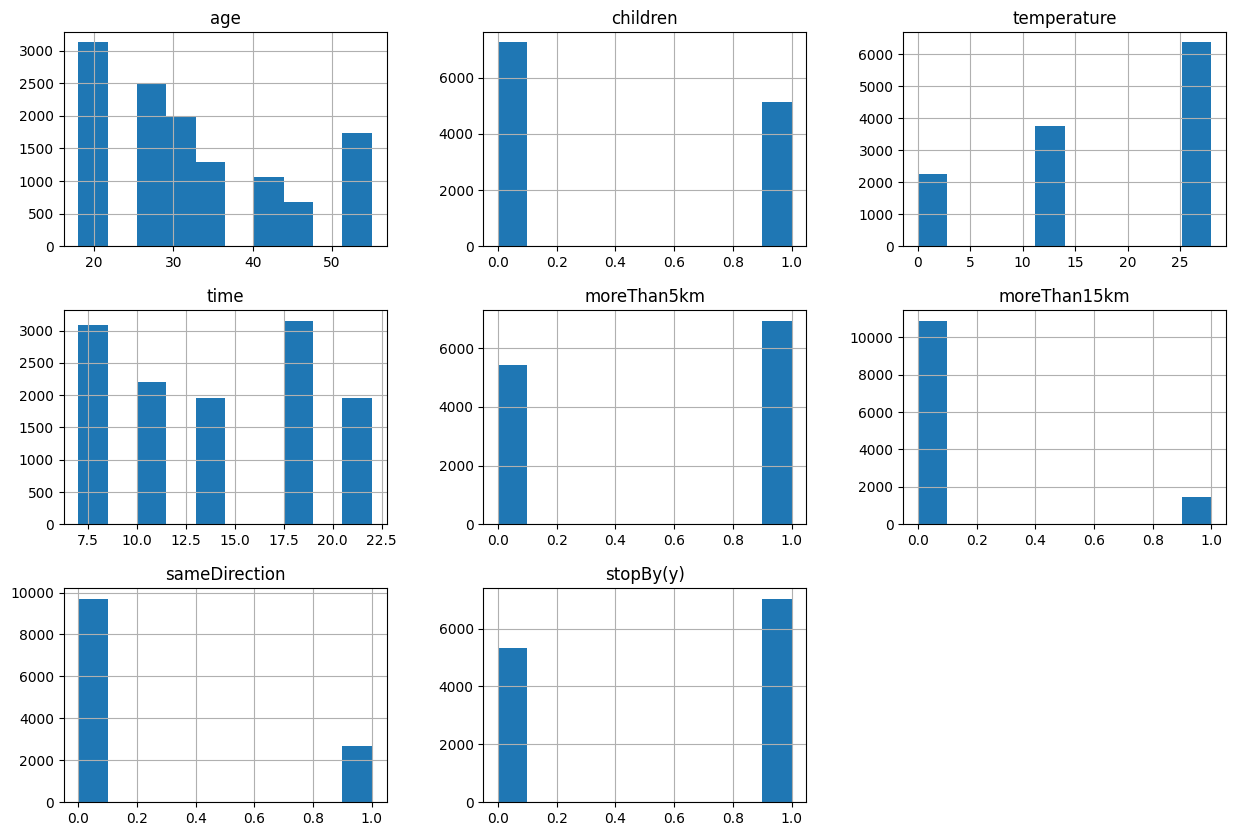

In [803]:
dataset.hist(bins = 10, figsize=(15,10))
plt.show()

In [804]:
dataset["age"].max()

55

#### Use boxplot to check for outliers

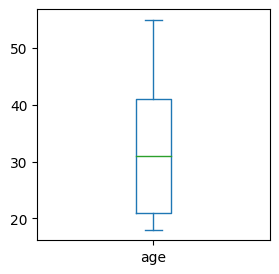

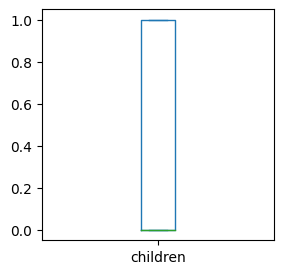

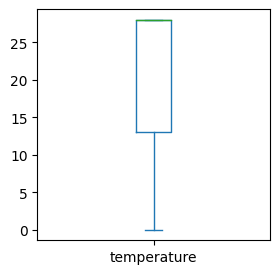

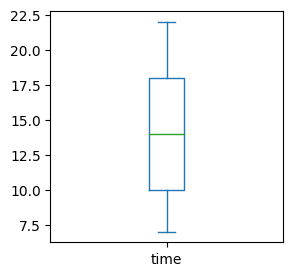

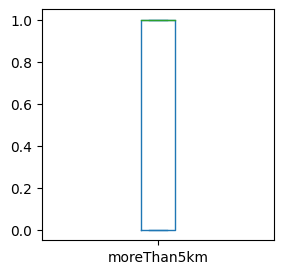

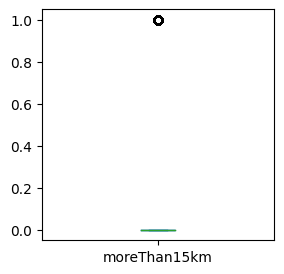

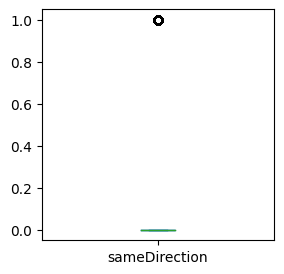

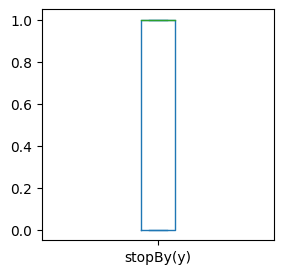

In [805]:
for i in dataset.select_dtypes(include='int64').columns.values:
    outlier = dataset[i]
    outlier.plot(kind='box', figsize=(3,3))
    plt.show()

## 2.2.2 Data Exploration for Categorical Data

#### Using for loop to obtain summary of categorical data

In [806]:
for i in dataset.select_dtypes(include="object").columns.values:
    print(dataset[i].value_counts(), '\n')


gender
Female    6348
Male      6024
Name: count, dtype: int64 

maritalStatus
Married     4976
Single      4641
Partner     2126
Divorced     500
Widowed      129
Name: count, dtype: int64 

education
College                 4253
Bachelors degree        4227
Graduate degree         1797
Associates degree       1119
High School Graduate     888
High School               88
Name: count, dtype: int64 

income
$25000 - $37499     1963
$12500 - $24999     1786
$37500 - $49999     1762
$100000 or More     1695
$50000 - $62499     1619
Less than $12500    1009
$87500 - $99999      876
$75000 - $87499      837
$62500 - $74999      825
Name: count, dtype: int64 

destination
Others    6118
Home      3163
Work      3091
Name: count, dtype: int64 

passanger
Alone      7138
Friends    3208
Partner    1051
Family      975
Name: count, dtype: int64 

weather
Sunny    9817
Snowy    1369
Rainy    1186
Name: count, dtype: int64 

visitPub
never         5073
rarely        3403
sometimes     2403
often

#### Histogram for visualising categorical data distribution

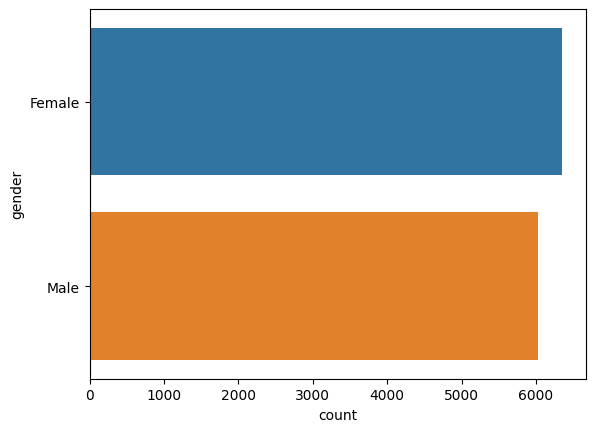

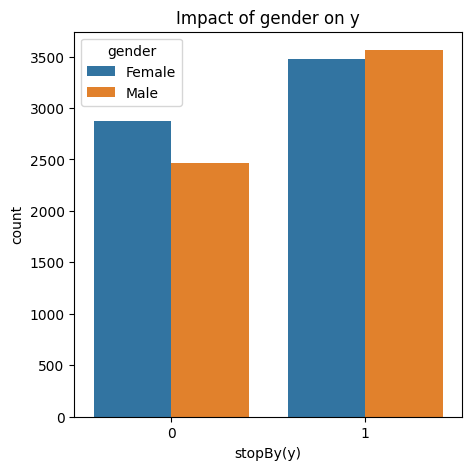

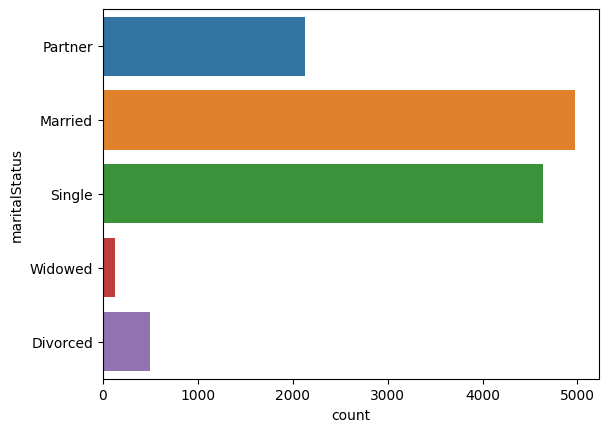

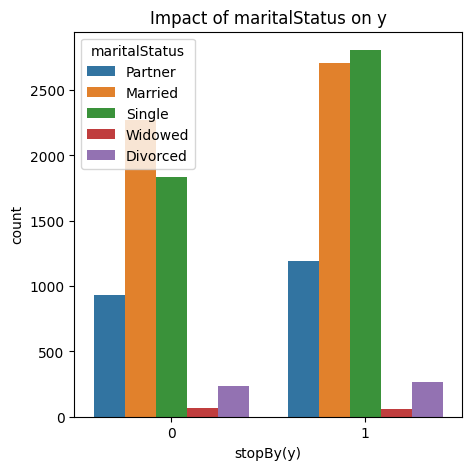

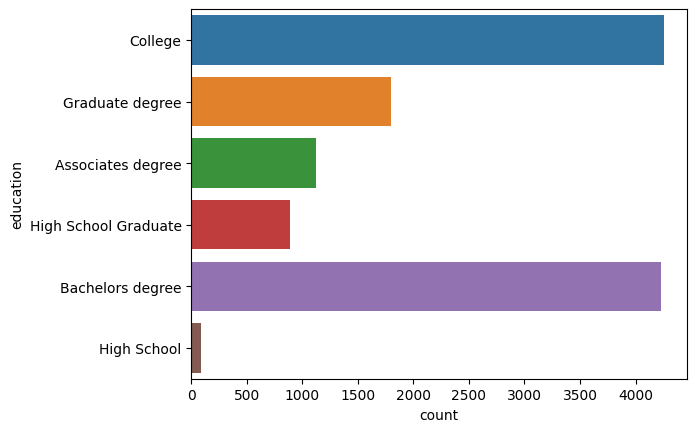

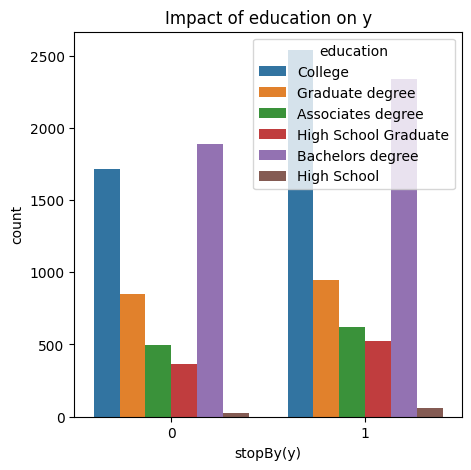

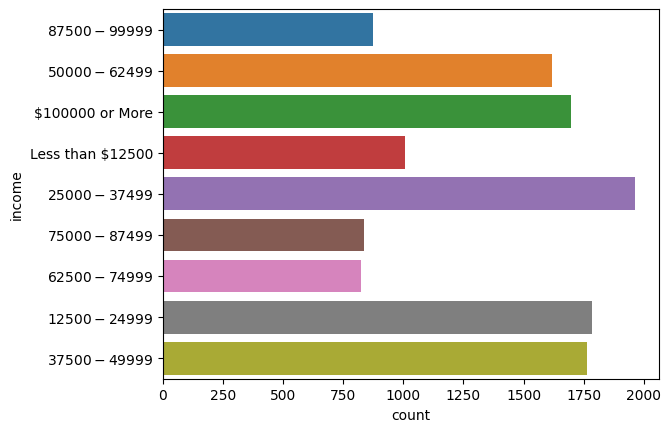

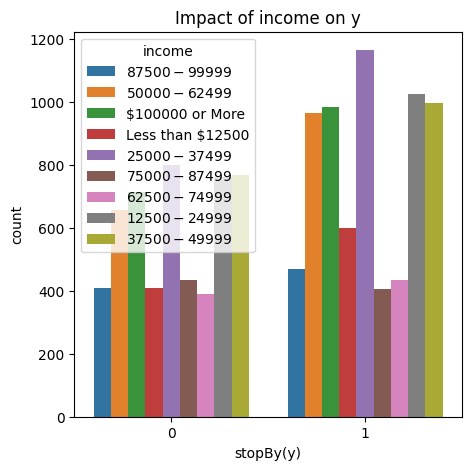

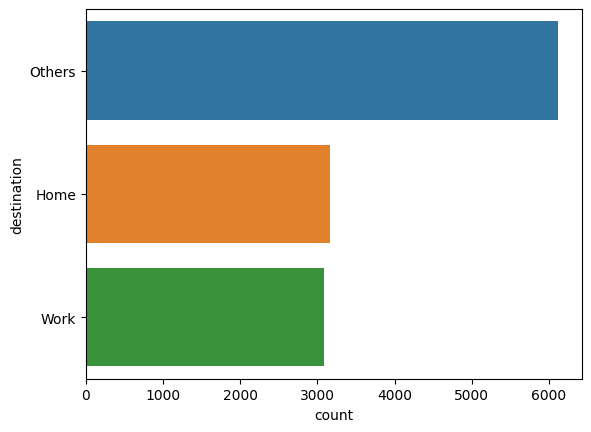

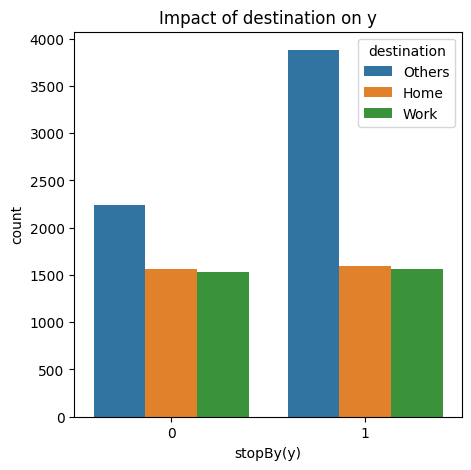

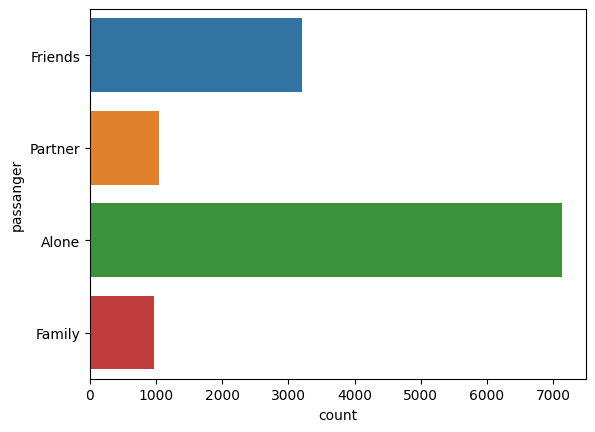

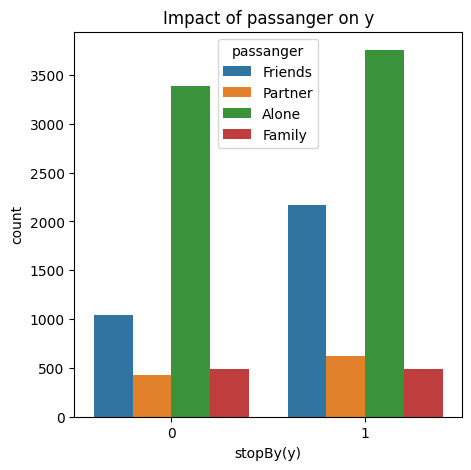

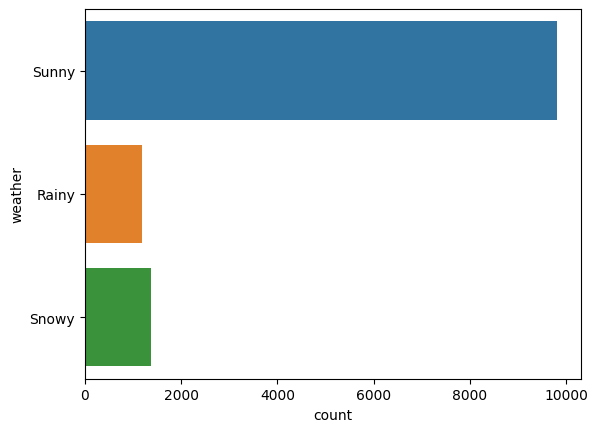

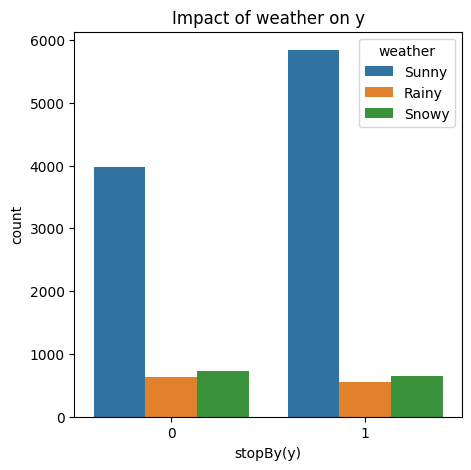

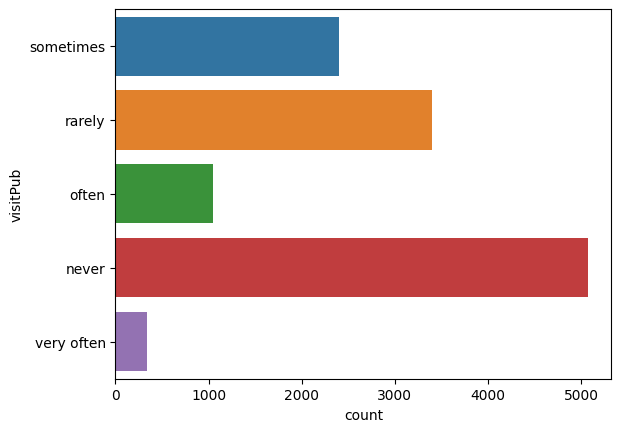

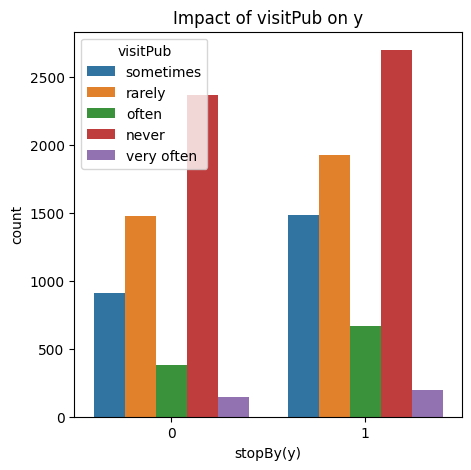

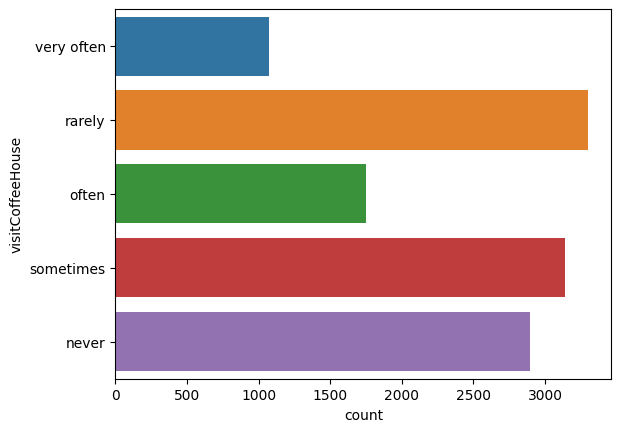

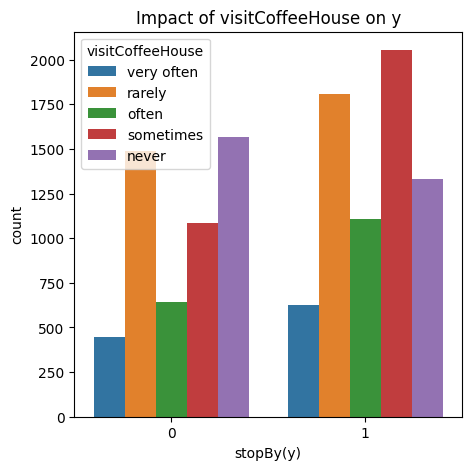

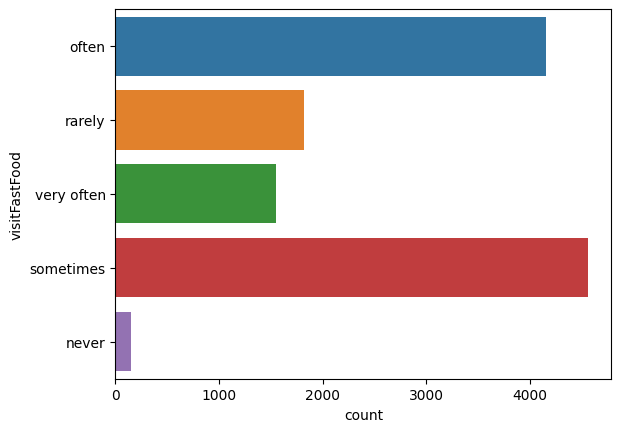

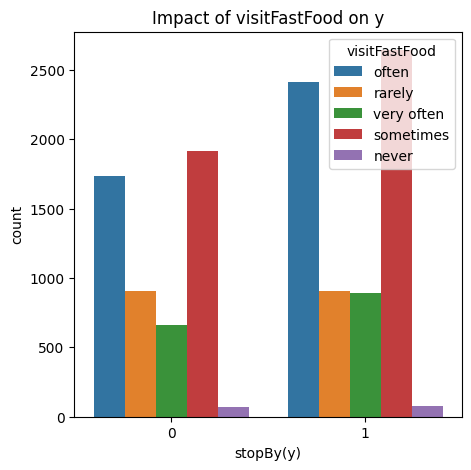

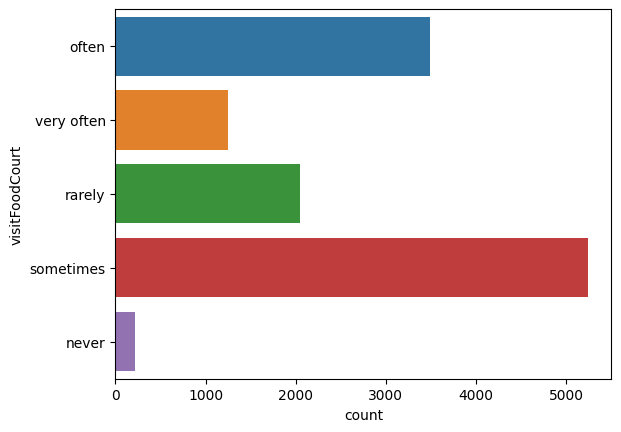

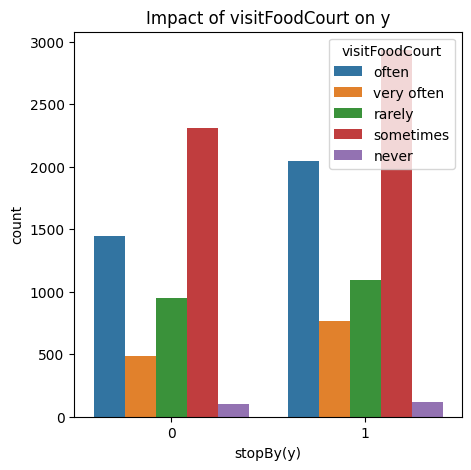

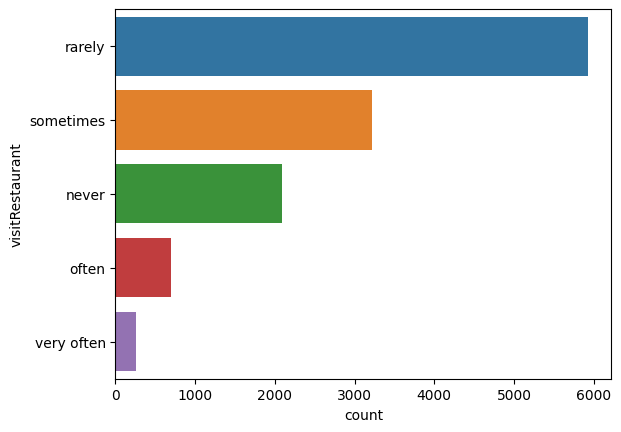

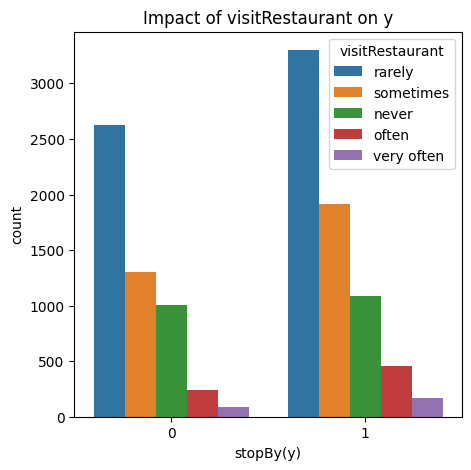

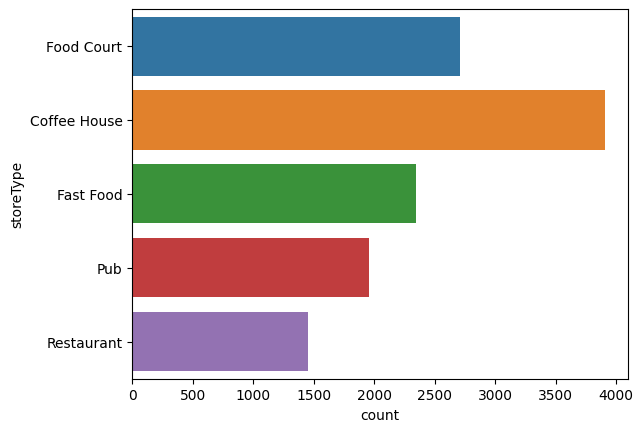

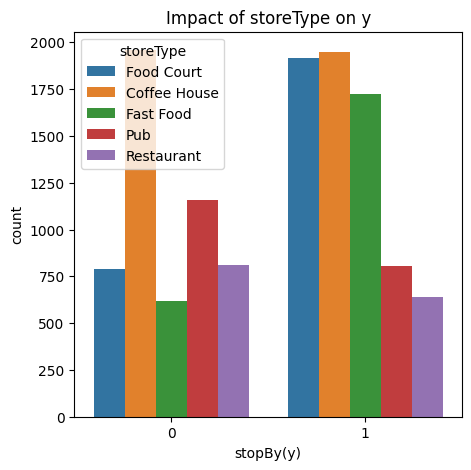

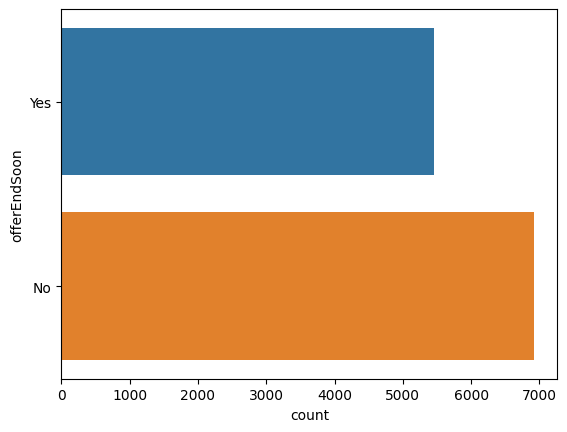

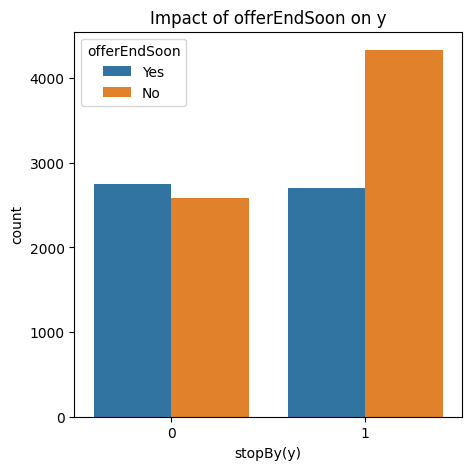

In [807]:
import seaborn as sns

for i in dataset.select_dtypes(include="object").columns.values:
    # check distribution
    sns.countplot(y=dataset[i], data=dataset)
    # check impact on y
    fig, ax=plt.subplots(figsize=(5,5))
    sns.countplot(x='stopBy(y)', data=dataset ,hue=i)
    plt.title("Impact of {} on y".format(i))
    plt.show()

## 2.2.3 Scatter Matrix

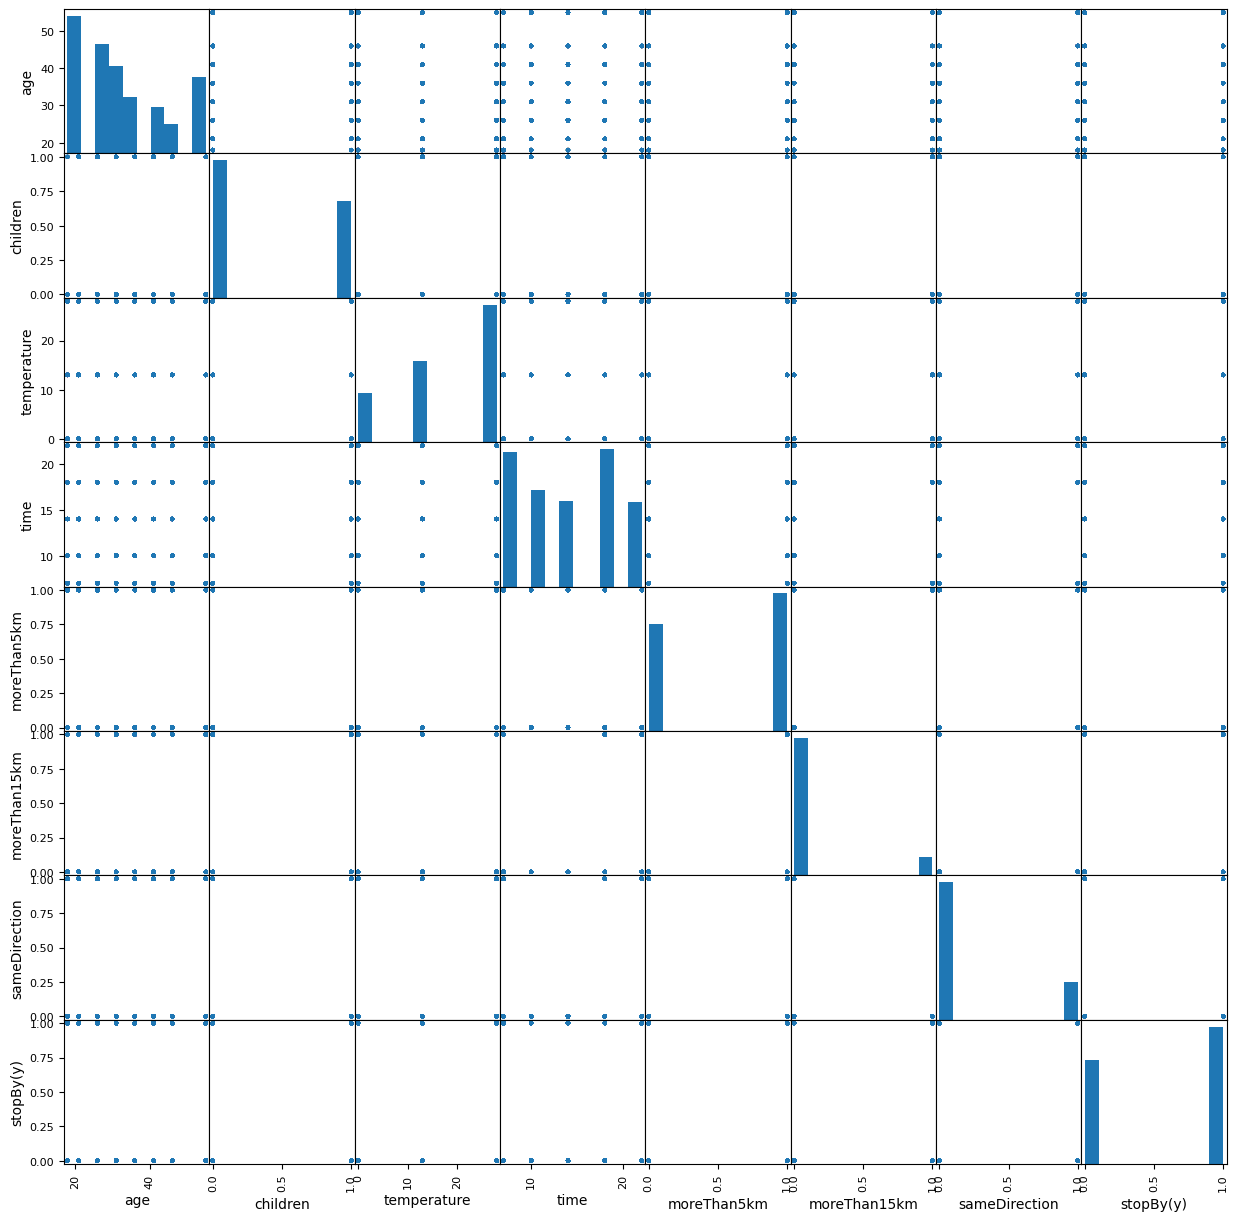

In [808]:
numerics = ['int64','float64']
from pandas.plotting import scatter_matrix
selected_cols = dataset.select_dtypes(include=numerics).columns.values

scatter_matrix(dataset[selected_cols], figsize=(15, 15))
plt.show()

## 2.2.4 Check on distribution of 'stopBy(y)'

In [809]:
dataset['stopBy(y)'].value_counts()

stopBy(y)
1    7036
0    5336
Name: count, dtype: int64

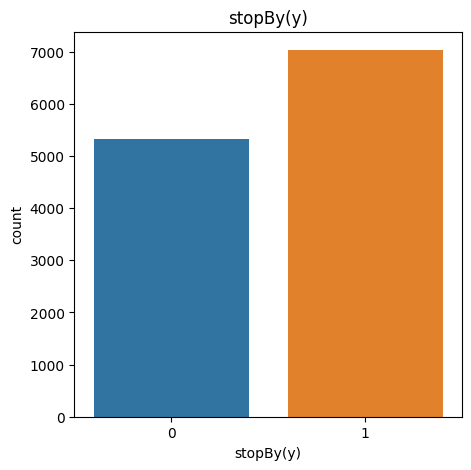

In [810]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(5,5))
sns.countplot(x='stopBy(y)', data=dataset)
plt.title("stopBy(y)")
plt.show()

# 2.3 Data Pre-processing

##  2.3.1 Check for null values 

In [811]:
# check if any columns with NaN
dataset.isnull().any()

gender              False
age                 False
maritalStatus       False
children            False
education           False
income              False
destination         False
passanger           False
weather             False
temperature         False
time                False
visitPub             True
visitCoffeeHouse     True
visitFastFood        True
visitFoodCourt       True
visitRestaurant      True
storeType           False
offerEndSoon        False
moreThan5km         False
moreThan15km        False
sameDirection       False
stopBy(y)           False
dtype: bool

<div style = "color:green"> From the result, we can see that there are null values in visitPub, visitCoffeeHouse, visitFastFood, visitFoodCourt and visitRestaurant </div>

## 2.3.2 Handling of Duplicated Values

#### Check for rows with duplicated value

In [812]:
data_dup = dataset[dataset.duplicated(keep='last')]
print(data_dup.shape)
data_dup

(100, 22)


,gender,age,maritalStatus,children,education,income,destination,passanger,weather,temperature,...,visitCoffeeHouse,visitFastFood,visitFoodCourt,visitRestaurant,storeType,offerEndSoon,moreThan5km,moreThan15km,sameDirection,stopBy(y)
166,Female,55,Single,0,Graduate degree,$12500 - $24999,Work,Alone,Sunny,28,...,never,often,often,rarely,Fast Food,No,1,1,0,1
169,Female,41,Single,1,College,$12500 - $24999,Work,Alone,Sunny,28,...,rarely,rarely,rarely,never,Fast Food,No,1,1,0,1
173,Male,46,Married,1,Graduate degree,$87500 - $99999,Others,Family,Sunny,28,...,sometimes,sometimes,rarely,sometimes,Restaurant,No,0,0,0,1
239,Female,31,Married,0,College,$100000 or More,Others,Partner,Sunny,28,...,rarely,very often,often,rarely,Food Court,No,1,0,0,1
291,Female,55,Single,0,Graduate degree,Less than $12500,Work,Alone,Sunny,28,...,very often,sometimes,rarely,rarely,Fast Food,No,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,Female,21,Single,0,Bachelors degree,$37500 - $49999,Work,Alone,Sunny,28,...,never,rarely,sometimes,never,Fast Food,No,1,1,0,0
9120,Female,31,Married,0,College,$100000 or More,Others,Friends,Sunny,0,...,rarely,very often,often,rarely,Fast Food,No,1,0,0,1
9290,Female,31,Married,0,College,$100000 or More,Others,Friends,Snowy,0,...,rarely,very often,often,rarely,Fast Food,No,1,0,0,1
9340,Female,31,Single,1,Bachelors degree,$37500 - $49999,Work,Alone,Sunny,28,...,rarely,often,NaN,rarely,Fast Food,No,1,1,0,0


#### Remove rows with duplicated values

In [813]:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(12272, 22)


## 2.3.3 Split Data into Train set and Test set

#### Split the data set into the input matrix and output vector

In [814]:
X = dataset.drop('stopBy(y)', axis = 1)
y = dataset['stopBy(y)']

#### Import train_test_split and set 42 as seed for random_state_parameter

In [815]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X shape:', X.shape)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X shape: (12272, 21)
X_train shape: (9817, 21)
X_test shape: (2455, 21)


## 2.3.4 Preprocessing Train Set

#### Split the input matrix into numerical and categorical attributes

In [816]:
cat_attr = dataset.select_dtypes(include="object").columns.values # x2345678
X_train_num = X_train.drop(cat_attr, axis = 1)
X_train_cat = X_train[cat_attr]

print('Shape of X_train_num', X_train_num.shape)
print('Shape of X_train_cat', X_train_cat.shape)

Shape of X_train_num (9817, 7)
Shape of X_train_cat (9817, 14)


#### Fill in missing values with "most frequest" strategy

In [817]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_tr = imputer_cat.transform(X_train_cat)

imputer_num = SimpleImputer(strategy = 'median')
imputer_num.fit(X_train_num)
X_train_num_tr = imputer_num.transform(X_train_num)

#### Standardize numeric data

In [818]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_tr = scaler.transform(X_train_num)

#### One-hot encode categorical data

In [819]:
from sklearn.preprocessing import LabelBinarizer

lb_encoder_gender = LabelBinarizer()
X_train_cat_tr_gender = lb_encoder_gender.fit(X_train_cat_tr[:, 0])
X_train_cat_tr_gender = lb_encoder_gender.transform(X_train_cat_tr[:, 0])

lb_encoder_maritalStatus = LabelBinarizer()
X_train_cat_tr_maritalStatus = lb_encoder_maritalStatus.fit(X_train_cat_tr[:, 1])
X_train_cat_tr_maritalStatus = lb_encoder_maritalStatus.transform(X_train_cat_tr[:, 1])

lb_encoder_education = LabelBinarizer()
X_train_cat_tr_education = lb_encoder_education.fit(X_train_cat_tr[:, 2])
X_train_cat_tr_education = lb_encoder_education.transform(X_train_cat_tr[:, 2])

lb_encoder_income = LabelBinarizer()
X_train_cat_tr_income = lb_encoder_income.fit(X_train_cat_tr[:, 3])
X_train_cat_tr_income = lb_encoder_income.transform(X_train_cat_tr[:, 3])

lb_encoder_destination = LabelBinarizer()
X_train_cat_tr_destination = lb_encoder_destination.fit(X_train_cat_tr[:, 4])
X_train_cat_tr_destination = lb_encoder_destination.transform(X_train_cat_tr[:, 4])

lb_encoder_passanger = LabelBinarizer()
X_train_cat_tr_passanger = lb_encoder_passanger.fit(X_train_cat_tr[:, 5])
X_train_cat_tr_passanger = lb_encoder_passanger.transform(X_train_cat_tr[:, 5])

lb_encoder_weather = LabelBinarizer()
X_train_cat_tr_weather = lb_encoder_weather.fit(X_train_cat_tr[:, 6])
X_train_cat_tr_weather = lb_encoder_weather.transform(X_train_cat_tr[:, 6])

lb_encoder_visitPub = LabelBinarizer()
X_train_cat_tr_visitPub = lb_encoder_visitPub.fit(X_train_cat_tr[:, 7])
X_train_cat_tr_visitPub = lb_encoder_visitPub.transform(X_train_cat_tr[:, 7])

lb_encoder_visitCoffeeHouse = LabelBinarizer()
X_train_cat_tr_visitCoffeeHouse = lb_encoder_visitCoffeeHouse.fit(X_train_cat_tr[:, 8])
X_train_cat_tr_visitCoffeeHouse = lb_encoder_visitCoffeeHouse.transform(X_train_cat_tr[:, 8])

lb_encoder_visitFastFood = LabelBinarizer()
X_train_cat_tr_visitFastFood = lb_encoder_visitFastFood.fit(X_train_cat_tr[:, 9])
X_train_cat_tr_visitFastFood = lb_encoder_visitFastFood.transform(X_train_cat_tr[:, 9])

lb_encoder_visitFoodCourt = LabelBinarizer()
X_train_cat_tr_visitFoodCourt = lb_encoder_visitFoodCourt.fit(X_train_cat_tr[:, 10])
X_train_cat_tr_visitFoodCourt = lb_encoder_visitFoodCourt.transform(X_train_cat_tr[:, 10])

lb_encoder_visitRestaurant = LabelBinarizer()
X_train_cat_tr_visitRestaurant = lb_encoder_visitRestaurant.fit(X_train_cat_tr[:, 11])
X_train_cat_tr_visitRestaurant = lb_encoder_visitRestaurant.transform(X_train_cat_tr[:, 11])

lb_encoder_storeType = LabelBinarizer()
X_train_cat_tr_storeType = lb_encoder_storeType.fit(X_train_cat_tr[:, 12])
X_train_cat_tr_storeType = lb_encoder_storeType.transform(X_train_cat_tr[:, 12])

lb_encoder_offerEndSoon = LabelBinarizer()
X_train_cat_tr_offerEndSoon = lb_encoder_offerEndSoon.fit(X_train_cat_tr[:, 13])
X_train_cat_tr_offerEndSoon = lb_encoder_offerEndSoon.transform(X_train_cat_tr[:, 13])


#### Combine the categorical data

In [820]:
X_train_cat_newtr = np.hstack([X_train_cat_tr_gender, X_train_cat_tr_maritalStatus])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_education])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_income])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_destination])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_passanger])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_weather])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_visitPub])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_visitCoffeeHouse])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_visitFastFood])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_visitFoodCourt])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_visitRestaurant])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_storeType])
X_train_cat_newtr = np.hstack([X_train_cat_newtr, X_train_cat_tr_offerEndSoon])

print('Shape of X_train_num_tr:', X_train_num_tr.shape)
print('Shape of X_train_cat_newtr',X_train_cat_newtr.shape,)

Shape of X_train_num_tr: (9817, 7)
Shape of X_train_cat_newtr (9817, 62)


#### Combine the transformed numerical and categorical sets

In [821]:
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_newtr])
y_train = y_train.values 
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (9817, 69)
y_train shape: (9817,)


## 2.3.5 Preprocessing Test Set

#### Separate the numerical values and categorical values

In [822]:
X_test_num = X_test.drop(cat_attr, axis = 1)
X_test_cat = X_test[cat_attr]

print('X_test_num.shape:', X_test_num.shape)
print('X_test_cat.shape:',X_test_cat.shape, '\n')

X_test_num.shape: (2455, 7)
X_test_cat.shape: (2455, 14) 



explain..

In [823]:
X_test_cat_tr = imputer_cat.transform(X_test_cat)
X_test_num_tr = X_test_num            # For name uniformity

explain....

In [824]:
X_test_cat_tr_gender = lb_encoder_gender.transform(X_test_cat_tr[:, 0])
X_test_cat_tr_maritalStatus = lb_encoder_maritalStatus.transform(X_test_cat_tr[:, 1])
X_test_cat_tr_education = lb_encoder_education.transform(X_test_cat_tr[:, 2])
X_test_cat_tr_income = lb_encoder_income.transform(X_test_cat_tr[:, 3])
X_test_cat_tr_destination = lb_encoder_destination.transform(X_test_cat_tr[:, 4])
X_test_cat_tr_passanger = lb_encoder_passanger.transform(X_test_cat_tr[:, 5])
X_test_cat_tr_weather = lb_encoder_weather.transform(X_test_cat_tr[:, 6])
X_test_cat_tr_visitPub = lb_encoder_visitPub.transform(X_test_cat_tr[:, 7])
X_test_cat_tr_visitCoffeeHouse = lb_encoder_visitCoffeeHouse.transform(X_test_cat_tr[:, 8])
X_test_cat_tr_visitFastFood = lb_encoder_visitFastFood.transform(X_test_cat_tr[:, 9])
X_test_cat_tr_visitFoodCourt = lb_encoder_visitFoodCourt.transform(X_test_cat_tr[:, 10])
X_test_cat_tr_visitRestaurant = lb_encoder_visitRestaurant.transform(X_test_cat_tr[:, 11])
X_test_cat_tr_storeType = lb_encoder_storeType.transform(X_test_cat_tr[:, 12])
X_test_cat_tr_offerEndSoon = lb_encoder_offerEndSoon.transform(X_test_cat_tr[:, 13])

X_test_cat_newtr = np.hstack([X_test_cat_tr_gender, X_test_cat_tr_maritalStatus])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_education])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_income])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_destination])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_passanger])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_weather])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_visitPub])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_visitCoffeeHouse])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_visitFastFood])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_visitFoodCourt])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_visitRestaurant])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_storeType])
X_test_cat_newtr = np.hstack([X_test_cat_newtr, X_test_cat_tr_offerEndSoon])

print('Shape of X_test_num_tr:', X_test_num_tr.shape)
print('Shape of X_test_cat_newtr:',X_test_cat_newtr.shape,'\n')

X_test_tr = np.hstack([X_test_num_tr, X_test_cat_newtr])
y_test = y_test.values
print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)


Shape of X_test_num_tr: (2455, 7)
Shape of X_test_cat_newtr: (2455, 62) 

X_test_tr shape: (2455, 69)
y_test shape: (2455,)


# 2.4 Model Training, Validation, Fine-tuning and Testing

## 2.4.1 Random Forest Classifier WITHOUT SMOTE-based technique

#### Training

In [825]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_clf.fit(X_train_tr, y_train)
y_pred = forest_clf.predict(X_train_tr)

### 2.4.1.1 Accuracy

In [826]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9870


In [827]:
# Non-SMOTE data potentially give a misleading high result
y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy using y_train_allfalse values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using y_train_allfalse values: 0.43251502495670774


### 2.4.1.2 Measuring training accuracy using Cross-validation

In [828]:
from sklearn.model_selection import cross_val_score

k_scores = cross_val_score(forest_clf, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.70333028, 0.70660147, 0.69896088])

In [829]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(forest_clf, X_train_tr, y_train, cv=3)

In [830]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2922 1324]
 [1592 3979]]


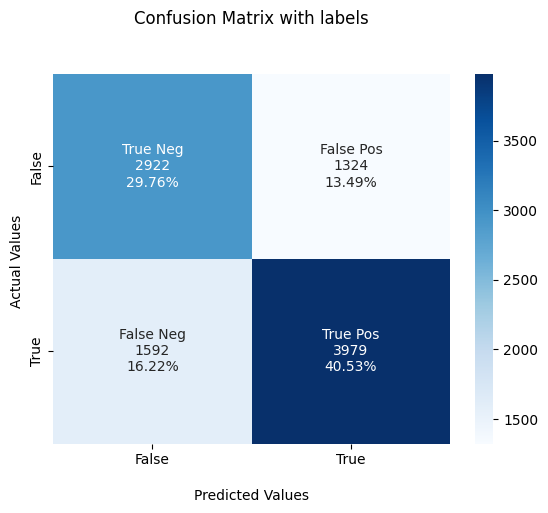

In [831]:
import seaborn as sns

def confusionMatrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

confusionMatrix(cm)

### 2.4.1.3 Precision, Recall and F1 Score

In [832]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.7503
Train recall    = 0.7142
Train f1 score  = 0.7318


### 2.4.1.4 precision-Recall Curve

In [833]:
y_scores_cv = cross_val_predict(forest_clf, X_train_tr, y_train, cv = 3, method="predict_proba")
y_scores_cv = y_scores_cv[:, 1]

y_scores_cv

array([0.5, 0.4, 0.8, ..., 0.5, 0.3, 0.2])

In [834]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

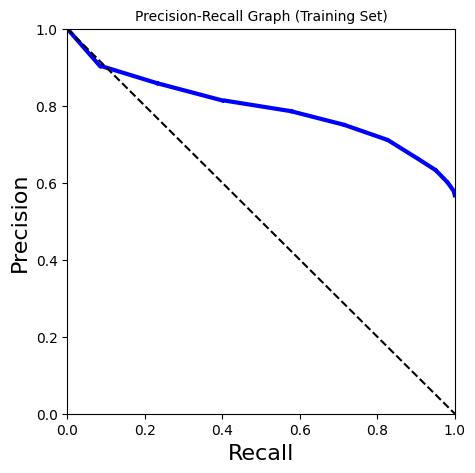

In [835]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(5, 5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.1.5 ROC Curve

In [836]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

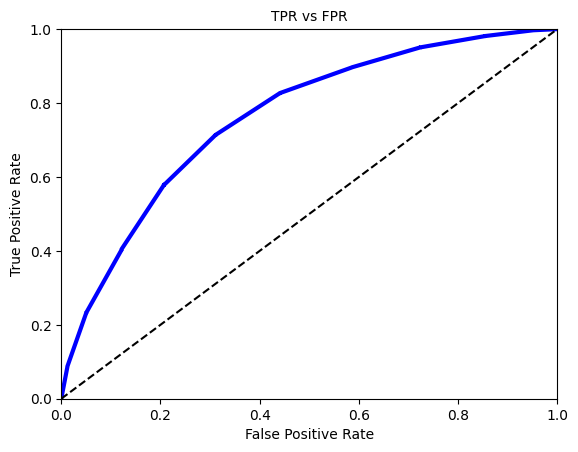

In [837]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=10)
    
plot_roc_curve(fpr, tpr)

In [838]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.7614


### 2.4.1.6 Fine-tune Random Forest Classifier using Grid Search

In [839]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True, False],'n_estimators': [15, 30, 45], 'max_features':[15, 20, 25, 30]}
forest_clf = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(forest_clf, param_grid, cv =5, n_jobs = -1)

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

Done


In [840]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'bootstrap': True, 'max_features': 30, 'n_estimators': 45}


In [841]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_features=30, n_estimators=45, random_state=42)

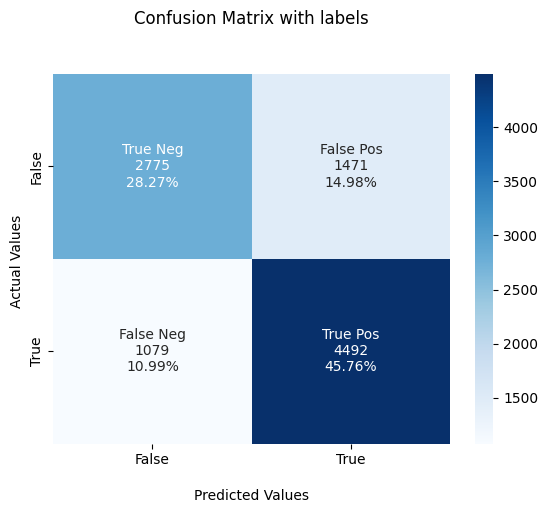

In [842]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

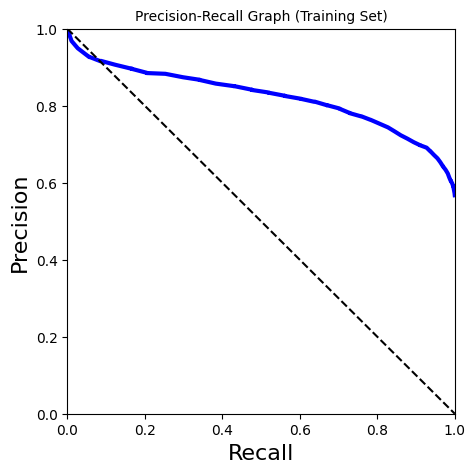

In [843]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:, 1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

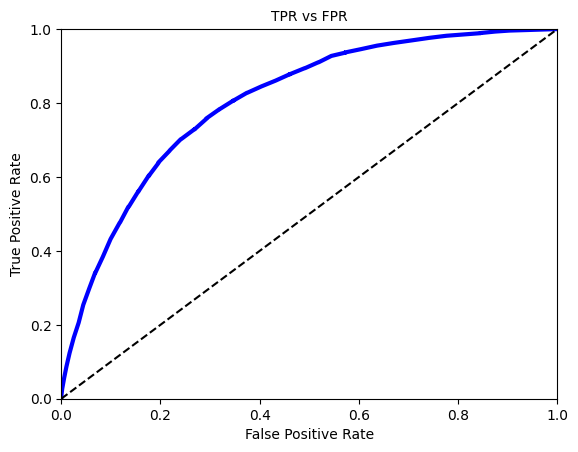

In [844]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [845]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.8040


In [846]:
y_pred_tuned = best_model.predict(X_train_tr)

train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.9979
precision = 0.7533
recall    = 0.8063
f1 score  = 0.7789


In [847]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = X_train_num.columns.tolist() + list(lb_encoder_gender.classes_) + list(lb_encoder_maritalStatus.classes_) + list(lb_encoder_education.classes_) + list(lb_encoder_income.classes_) + list(lb_encoder_destination.classes_) + list(lb_encoder_passanger.classes_) + list(lb_encoder_weather.classes_) + list(lb_encoder_visitPub.classes_) + list(lb_encoder_visitCoffeeHouse.classes_) + list(lb_encoder_visitFastFood.classes_) + list(lb_encoder_visitFoodCourt.classes_) + list(lb_encoder_visitRestaurant.classes_) + list(lb_encoder_storeType.classes_)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.05786105994562212, 'age'),
 (0.04447378157125881, 'time'),
 (0.0306623689657912, 'Coffee House'),
 (0.03000182419491036, 'Restaurant'),
 (0.028259660228675845, 'Fast Food'),
 (0.02719528549728788, 'very often'),
 (0.025181257838608223, 'Sunny'),
 (0.023801256025641534, 'temperature'),
 (0.02151789060871876, 'Female'),
 (0.02040288037332044, 'moreThan5km'),
 (0.02020027091989954, 'very often'),
 (0.01714117421285868, 'Home'),
 (0.016982123009079156, 'Associates degree'),
 (0.016772404276047793, 'rarely'),
 (0.016725625837619676, 'Food Court'),
 (0.016528417209968404, 'rarely'),
 (0.016353506826696285, 'often'),
 (0.016144338002984367, 'children'),
 (0.016042843610417894, 'often'),
 (0.015878215228948334, 'Bachelors degree'),
 (0.01572155890617646, 'rarely'),
 (0.015706032949764522, 'never'),
 (0.015632621982275444, 'moreThan15km'),
 (0.015436283918122289, '$12500 - $24999'),
 (0.01508053849717553, 'never'),
 (0.015006481844398335, '$37500 - $49999'),
 (0.01497637728350084, 'often'),

### 2.4.1.7 Evaluation on Test Set

#### Use the trained classifier to predict on test set

In [848]:
y_pred_tuned = best_model.predict(X_test_tr)

#### Compute and print the precision, recall, f1 score of the prediction

In [849]:
train_acc = accuracy_score(y_test, y_pred_tuned)
print("Training accuracy: {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Training accuracy: 0.7238
precision = 0.7685
recall    = 0.7366
f1 score  = 0.7522


## 2.4.2 Random Forest Classifier WITH SMOTE Technique

In [850]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

forest_clf = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators = 10, random_state = 42))
forest_clf.fit(X_train_tr, y_train)
y_pred = forest_clf.predict(X_train_tr)

### 2.4.2.1 Accuracy

In [851]:
train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9877


### 2.4.2.2 Measuring training accuracy using Cross-Validation

In [852]:
k_scores = cross_val_score(forest_clf, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.69966392, 0.69957213, 0.7096577 ])

In [853]:
y_pred_cv = cross_val_predict(forest_clf, X_train_tr, y_train, cv=3)

In [854]:
cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[3010 1236]
 [1680 3891]]


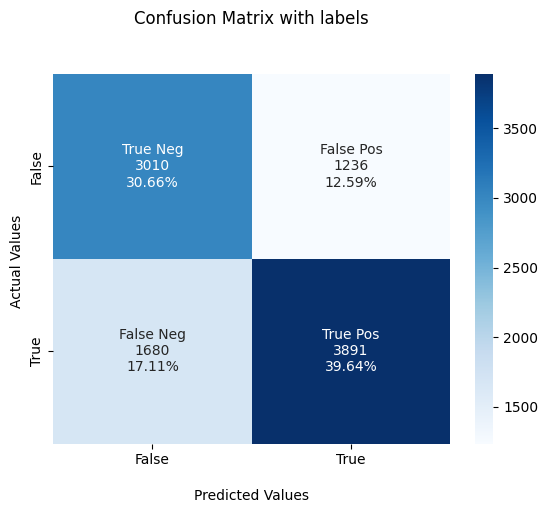

In [855]:
confusionMatrix(cm)

### 2.4.2.3 Precision, Recall and F1 Score

In [856]:
print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.7589
Train recall    = 0.6984
Train f1 score  = 0.7274


### 2.4.2.4 Precision-Recall Curve

In [857]:
y_scores_cv = cross_val_predict(forest_clf, X_train_tr, y_train, cv = 3, method="predict_proba")
y_scores_cv = y_scores_cv[:, 1]

y_scores_cv

array([0.5, 0.3, 0.9, ..., 0.4, 0.3, 0.2])

In [858]:
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

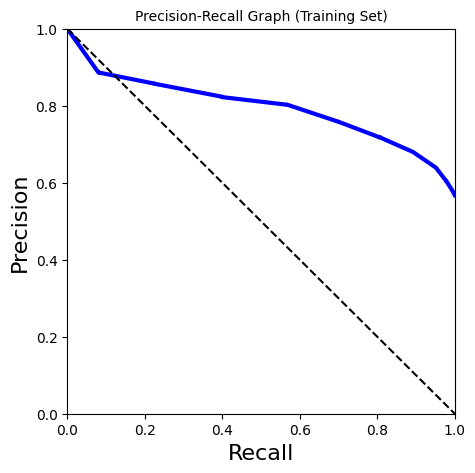

In [859]:
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.2.5 ROC Curve

In [860]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

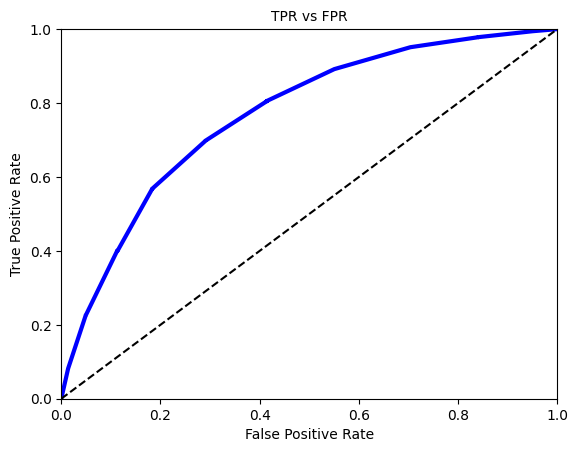

In [861]:
plot_roc_curve(fpr, tpr)

In [862]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.7674


### 2.4.2.6 Fine-tune Random Forest Classifier using Grid Search

In [863]:
param_grid = {'bootstrap': [True, False],'n_estimators': [15, 30, 45], 'max_features':[15, 20, 25, 30]}
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}

#param_grid = {'bootstrap': [True, False],'n_estimators': [15, 30, 45], 'max_features':[15, 20, 25, 30]}
forest_clf = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators=10, random_state=42))
grid_search = GridSearchCV(forest_clf, new_params, cv =5, n_jobs = -1)

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

Done


In [864]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__n_estimators': 45}


In [865]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_features=20,
                                        n_estimators=45, random_state=42))])

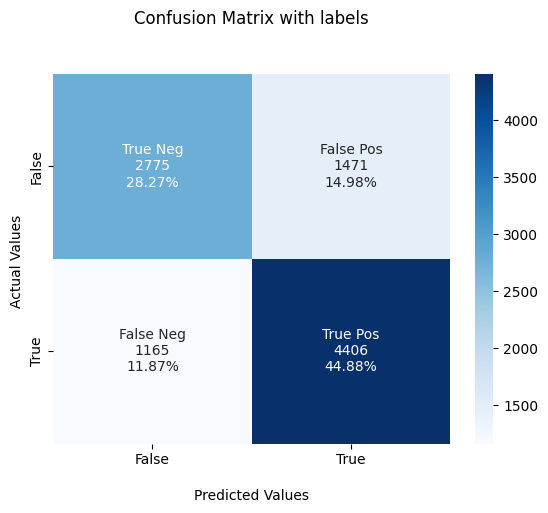

In [866]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

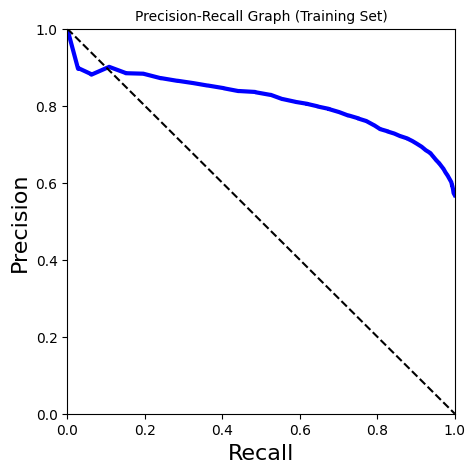

In [867]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:, 1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

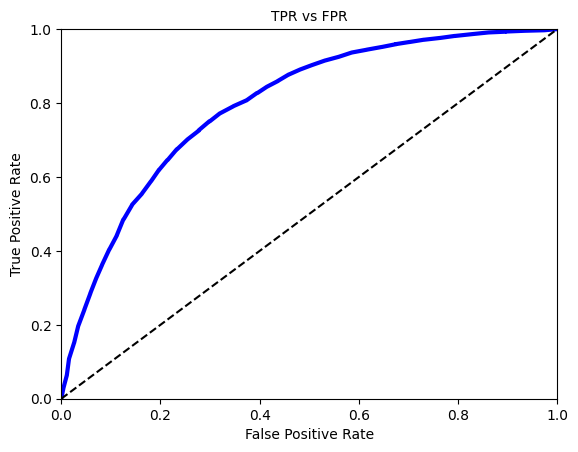

In [868]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [869]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7956


In [870]:
# Use the tuned classifier to predict on test set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.9982
precision = 0.7497
recall    = 0.7909
f1 score  = 0.7697


### 2.4.2.7 Evaluation on Test Set 

In [871]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.7202
precision = 0.7714
recall    = 0.7223
f1 score  = 0.7460


In [872]:
feature_importances = best_model.steps[1][1].feature_importances_
attributes = X_train_num.columns.tolist() + list(lb_encoder_gender.classes_) + list(lb_encoder_maritalStatus.classes_) + list(lb_encoder_education.classes_) + list(lb_encoder_income.classes_) + list(lb_encoder_destination.classes_) + list(lb_encoder_passanger.classes_) + list(lb_encoder_weather.classes_) + list(lb_encoder_visitPub.classes_) + list(lb_encoder_visitCoffeeHouse.classes_) + list(lb_encoder_visitFastFood.classes_) + list(lb_encoder_visitFoodCourt.classes_) + list(lb_encoder_visitRestaurant.classes_) + list(lb_encoder_storeType.classes_)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.05449271175330377, 'age'),
 (0.04366082918340774, 'time'),
 (0.04008790990777555, 'Restaurant'),
 (0.035617581494095066, 'Coffee House'),
 (0.035147611213382994, 'Fast Food'),
 (0.03210883193266576, 'very often'),
 (0.02463159457273617, 'Sunny'),
 (0.024264715351502097, 'temperature'),
 (0.023591795496857134, 'very often'),
 (0.021800154770096173, 'Female'),
 (0.02135252281666052, 'Food Court'),
 (0.020733555869729706, 'moreThan5km'),
 (0.016926057286943044, 'Associates degree'),
 (0.016596442010526784, 'Family'),
 (0.01650106968703089, 'rarely'),
 (0.015899240133147134, 'rarely'),
 (0.015812273760292858, 'rarely'),
 (0.015733563738239028, 'never'),
 (0.015527189174329211, 'often'),
 (0.015127725534628154, 'often'),
 (0.014898667460411175, 'Bachelors degree'),
 (0.014807245610193615, 'often'),
 (0.01474607081617371, 'rarely'),
 (0.014727697392763847, 'Home'),
 (0.014624721848784593, 'moreThan15km'),
 (0.014415017175440024, 'children'),
 (0.014381134110920124, 'Partner'),
 (0.014127

## 2.4.3 SGD Classifier WITHOUT SMOTE Technique

#### Training

In [873]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42, max_iter = 5, tol = None)
sgd_clf.fit(X_train_tr, y_train)
y_pred = sgd_clf.predict(X_train_tr)

### 2.4.3.1 Accuracy

In [874]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.6201


#### 2.4.3.2 Measuring training accuracy using Cross-Validation

In [875]:
from sklearn.model_selection import cross_val_score

k_scores = cross_val_score(sgd_clf, X_train_tr, y_train, cv=3, scoring='accuracy')
k_scores

array([0.57959059, 0.61522005, 0.60513447])

In [876]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict (sgd_clf, X_train_tr, y_train, cv=3)

In [877]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

[[1824 2422]
 [1505 4066]]


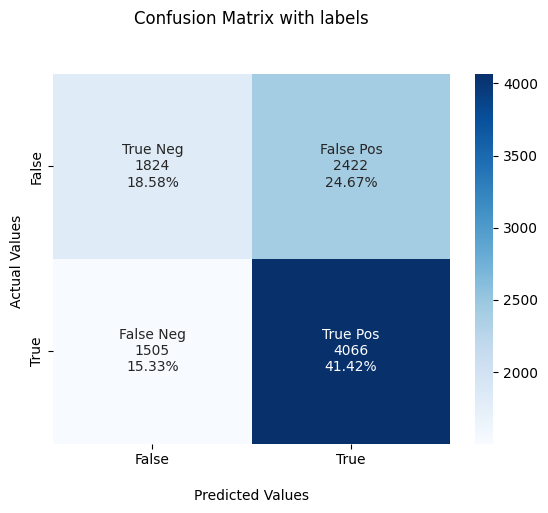

In [878]:
import seaborn as sns

def confusionMatrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

confusionMatrix(cm)

### 2.4.3.3 Precision, Recall and F1 Score

In [879]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('recall = {:.4f}'.format(recall_score (y_train, y_pred_cv)))
print('f1 score = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

precision = 0.6267
recall = 0.7299
f1 score = 0.6744


### 2.4.3.4 Precision-Recall curve

In [880]:
y_scores_cv = cross_val_predict (sgd_clf, X_train_tr, y_train, cv = 3, method = "decision_function")
y_scores_cv

array([ 3.09920231,  1.36623845, -2.10904286, ..., -6.86965499,
        6.85697707,  2.51819089])

In [881]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve (y_train, y_scores_cv)

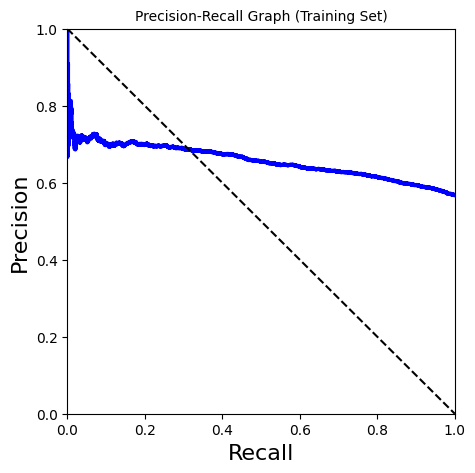

In [882]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.3.5 ROC Curve

In [883]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

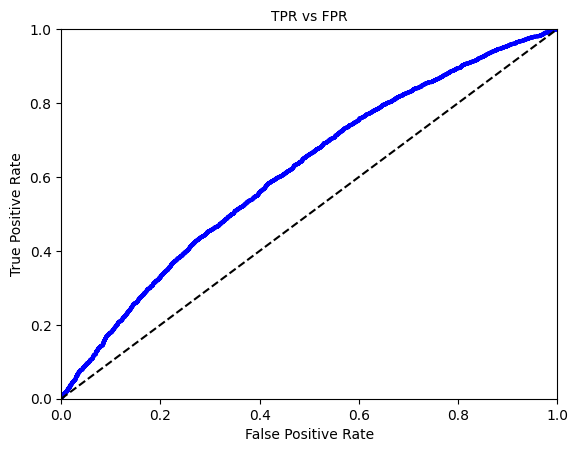

In [884]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=10)
    
plot_roc_curve(fpr, tpr)

In [885]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.6125


### 2.4.3.6 Fine-tune SGD Classifier using Grid Search

In [886]:
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(random_state = 42, max_iter = 5, tol = None)
param_grid = {"max_iter": [110, 115, 120], 
              "loss": ["log_loss", "modified_huber", "squared_error"],
              "alpha": [0.10, 0.01, 0.001]}
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, error_score='raise')

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')


Performing grid search... 

Done


In [887]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 110}


In [888]:
best_model = grid_search.best_estimator_
best_model

SGDClassifier(alpha=0.01, loss='modified_huber', max_iter=110, random_state=42,
              tol=None)

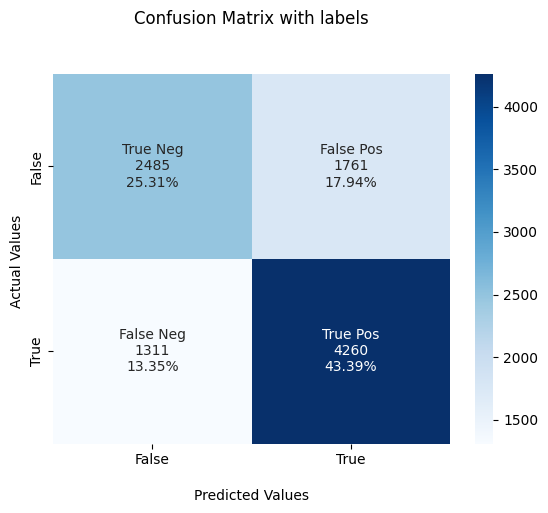

In [889]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

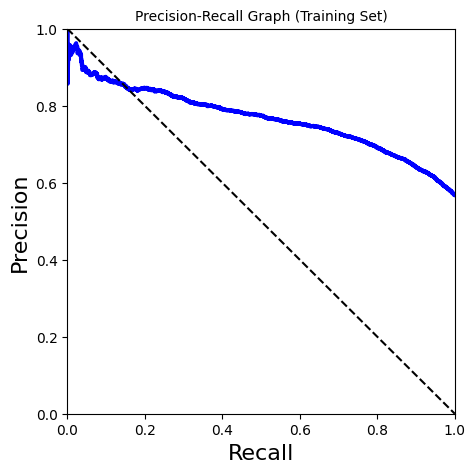

In [890]:
y_scores_cv_tuned = cross_val_predict (best_model, X_train_tr, y_train, cv = 3, method = "decision_function")

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

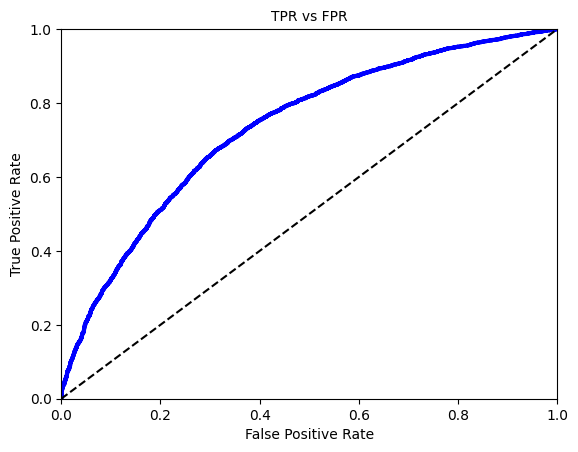

In [891]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [892]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7329


In [893]:
# Use the tuned classifier to predict on train set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.6902
precision = 0.7075
recall    = 0.7647
f1 score  = 0.7350


### 2.4.3.7 Evaluation on Test Set

In [894]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.4782
precision = 0.8766
recall    = 0.0966
f1 score  = 0.1741


## 2.4.4 SGD Classifier WITH SMOTE Technique

In [895]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

sgd_clf = make_pipeline(SMOTE(random_state=42), SGDClassifier(random_state = 42, max_iter = 5, tol = None))
sgd_clf.fit(X_train_tr, y_train)
y_pred = sgd_clf.predict(X_train_tr)

### 2.4.4.1 Accuracy

In [896]:
train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.6111


### 2.4.4.2 Measuring training accuracy using Cross-Validation

In [897]:
k_scores = cross_val_score(sgd_clf, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.60311641, 0.58496333, 0.60055012])

In [898]:
y_pred_cv = cross_val_predict(sgd_clf, X_train_tr, y_train, cv=3)

In [899]:
cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2586 1660]
 [2304 3267]]


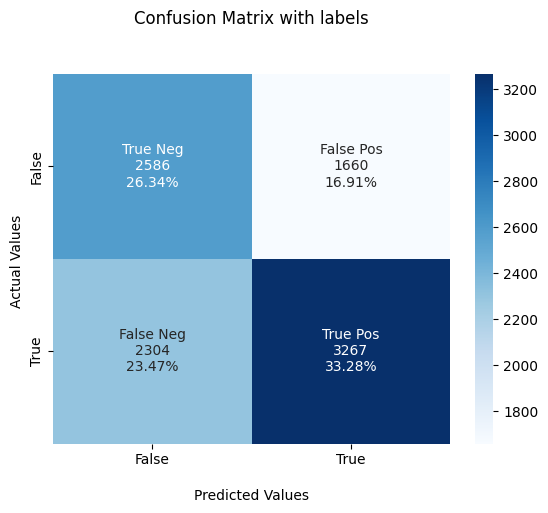

In [900]:
confusionMatrix(cm)

### 2.4.4.3 Precision, Recall and F1 Score

In [901]:
print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.6631
Train recall    = 0.5864
Train f1 score  = 0.6224


### 2.4.4.4 Precision-Recall Curve

In [902]:
y_scores_cv = cross_val_predict (sgd_clf, X_train_tr, y_train, cv = 3, method = "decision_function")
y_scores_cv

array([-5.80411967, -0.14468514, -2.47230616, ..., -5.25447127,
       -0.7338915 ,  1.02790325])

In [903]:
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

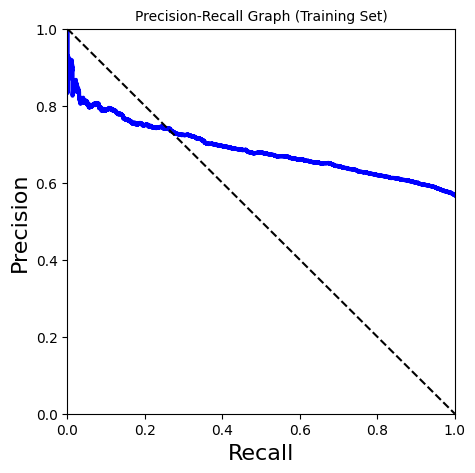

In [904]:
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.4.5 ROC Curve

In [905]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

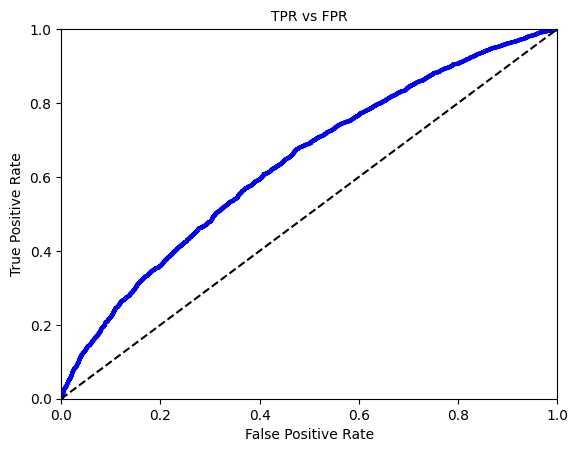

In [906]:
plot_roc_curve(fpr, tpr)

In [907]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.6365


### 2.4.4.6 Fine-tune SGD Classifier using Grid Search

In [908]:
param_grid = {"max_iter": [110, 115, 120], 
              "loss": ["log_loss", "modified_huber", "squared_error"],
              "alpha": [0.10, 0.01, 0.001]}
new_params = {'sgdclassifier__' + key: param_grid[key] for key in param_grid}

sgd_clf = make_pipeline(SMOTE(random_state=42), SGDClassifier(random_state = 42, max_iter = 5, tol = None))
grid_search = GridSearchCV(sgd_clf, new_params, cv =5, error_score='raise')

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

Done


In [909]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'sgdclassifier__alpha': 0.001, 'sgdclassifier__loss': 'log_loss', 'sgdclassifier__max_iter': 110}


In [910]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, loss='log_loss', max_iter=110,
                               random_state=42, tol=None))])

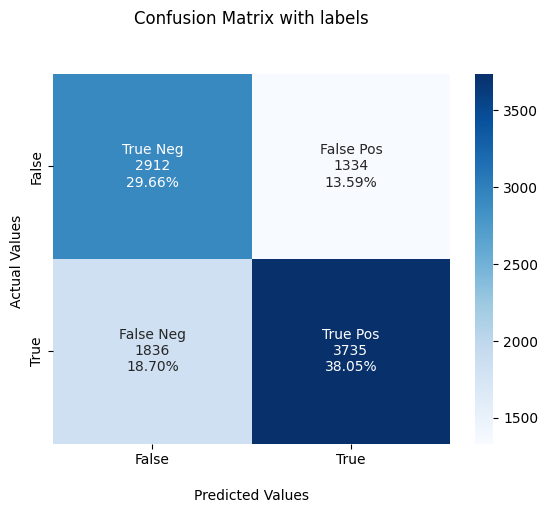

In [911]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

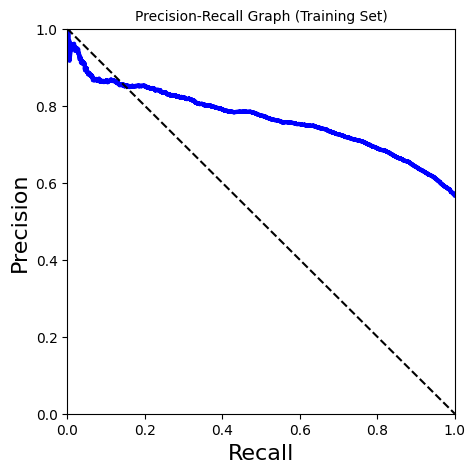

In [912]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'decision_function')

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

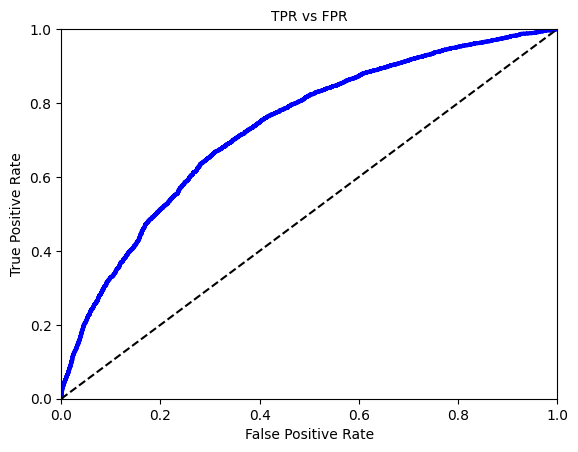

In [913]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [914]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7321


In [915]:
# Use the tuned classifier to predict on test set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.6859
precision = 0.7368
recall    = 0.6704
f1 score  = 0.7021


### 2.4.4.7 Evaluation on Test Set

In [916]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.4599
precision = 0.9176
recall    = 0.0558
f1 score  = 0.1053


In [917]:
attributes = X_train_num.columns.tolist() + list(lb_encoder_gender.classes_) + list(lb_encoder_maritalStatus.classes_) + list(lb_encoder_education.classes_) + list(lb_encoder_income.classes_) + list(lb_encoder_destination.classes_) + list(lb_encoder_passanger.classes_) + list(lb_encoder_weather.classes_) + list(lb_encoder_visitPub.classes_) + list(lb_encoder_visitCoffeeHouse.classes_) + list(lb_encoder_visitFastFood.classes_) + list(lb_encoder_visitFoodCourt.classes_) + list(lb_encoder_visitRestaurant.classes_) + list(lb_encoder_storeType.classes_)
for i,v in enumerate(attributes):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: 0, Score: age
Feature: 1, Score: children
Feature: 2, Score: temperature
Feature: 3, Score: time
Feature: 4, Score: moreThan5km
Feature: 5, Score: moreThan15km
Feature: 6, Score: sameDirection
Feature: 7, Score: Female
Feature: 8, Score: Male
Feature: 9, Score: Divorced
Feature: 10, Score: Married
Feature: 11, Score: Partner
Feature: 12, Score: Single
Feature: 13, Score: Widowed
Feature: 14, Score: Associates degree
Feature: 15, Score: Bachelors degree
Feature: 16, Score: College
Feature: 17, Score: Graduate degree
Feature: 18, Score: High School
Feature: 19, Score: High School Graduate
Feature: 20, Score: $100000 or More
Feature: 21, Score: $12500 - $24999
Feature: 22, Score: $25000 - $37499
Feature: 23, Score: $37500 - $49999
Feature: 24, Score: $50000 - $62499
Feature: 25, Score: $62500 - $74999
Feature: 26, Score: $75000 - $87499
Feature: 27, Score: $87500 - $99999
Feature: 28, Score: Less than $12500
Feature: 29, Score: Home
Feature: 30, Score: Others
Feature: 31, Score: 

Feature: 0, Score: -0.03056
Feature: 1, Score: 0.02701
Feature: 2, Score: -0.02904
Feature: 3, Score: -0.04751
Feature: 4, Score: -0.04093
Feature: 5, Score: 0.07109
Feature: 6, Score: 0.21909
Feature: 7, Score: 0.21888
Feature: 8, Score: -0.07789
Feature: 9, Score: 0.00493
Feature: 10, Score: -0.08715
Feature: 11, Score: 0.17947
Feature: 12, Score: 0.03126
Feature: 13, Score: 0.07254
Feature: 14, Score: -0.15227
Feature: 15, Score: 0.04698
Feature: 16, Score: -0.36022
Feature: 17, Score: 0.31541
Feature: 18, Score: 0.12817
Feature: 19, Score: 0.11244
Feature: 20, Score: 0.01344
Feature: 21, Score: 0.20280
Feature: 22, Score: 0.08202
Feature: 23, Score: 0.24424
Feature: 24, Score: -0.21963
Feature: 25, Score: -0.12510
Feature: 26, Score: -0.25252
Feature: 27, Score: -0.00708
Feature: 28, Score: -0.13706
Feature: 29, Score: 0.52818
Feature: 30, Score: -0.34050
Feature: 31, Score: -0.02809
Feature: 32, Score: -0.35400
Feature: 33, Score: 0.20457
Feature: 34, Score: 0.22814
Feature: 35, S

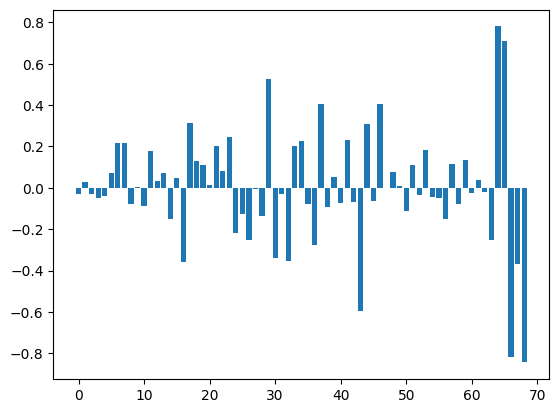

In [918]:
from matplotlib import pyplot
importance = best_model.steps[1][1].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 2.4.5 Logistic Regression Classifier WITHOUT SMOTE Technique

#### Training

In [919]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42, class_weight='balanced')
log_reg.fit(X_train_tr, y_train)
y_pred = log_reg.predict(X_train_tr)

### 2.4.5.1 Accuracy

In [920]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.6853


### 2.4.5.2 Measuring training accuracy using Cross-Validation

In [921]:
from sklearn.model_selection import cross_val_score

k_scores = cross_val_score(log_reg, X_train_tr, y_train, cv=3, scoring = "accuracy")
k_scores

array([0.68622059, 0.67603912, 0.674511  ])

In [922]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(log_reg, X_train_tr, y_train, cv=3)

In [923]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2885 1361]
 [1791 3780]]


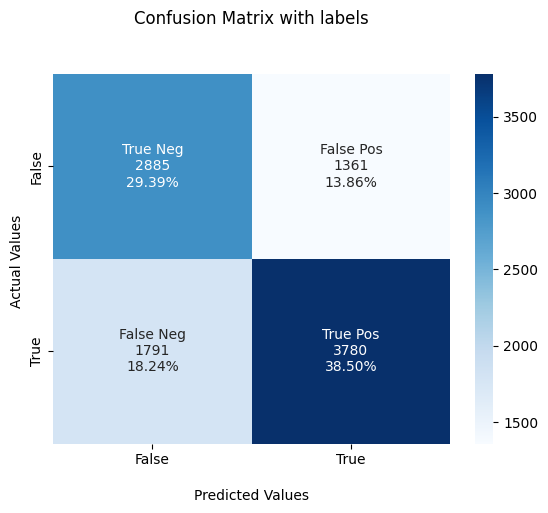

In [924]:
import seaborn as sns

def confusionMatrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

confusionMatrix(cm)

### 2.4.5.3 Precision, Recall and F1 Score

In [925]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision = {:.4f}".format(precision_score(y_train, y_pred_cv)))
print("Recall = {:.4f}".format(recall_score(y_train, y_pred_cv)))
print("f1 score = {:.4f}".format(f1_score(y_train, y_pred_cv)))

Precision = 0.7353
Recall = 0.6785
f1 score = 0.7058


### 2.4.5.4 Precision-Recall Curve

In [926]:
y_scores_cv = cross_val_predict(log_reg, X_train_tr, y_train, cv=3, method="predict_proba")
y_scores_cv = y_scores_cv[:,1]

In [927]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

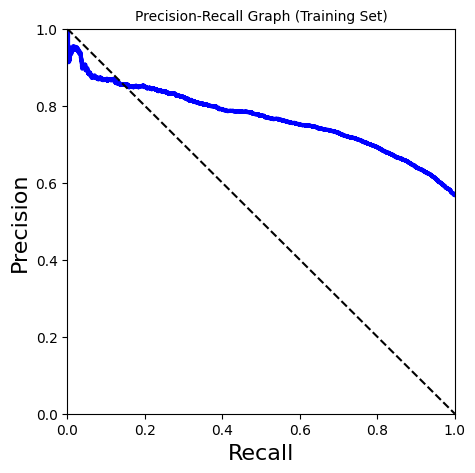

In [928]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(5, 5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.5.5 ROC Curve

In [929]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

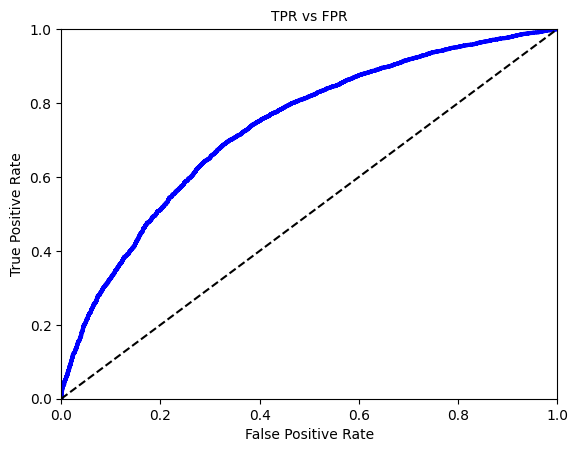

In [930]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=10)
    
plot_roc_curve(fpr, tpr)

In [931]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.7330


### 2.4.5.6 Fine-tune Logistic Regression using Grid Search

In [932]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state = 42)
param_grid = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'penalty':['l1','l2','elasticnet'], 'C':[100,10,1.0,0.1,0.01]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring = "accuracy")

print ('Performing grid search...', end = '')
grid_search.fit(X_train_tr, y_train)
print('done')

Performing grid search...

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

done


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\

In [933]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [934]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')

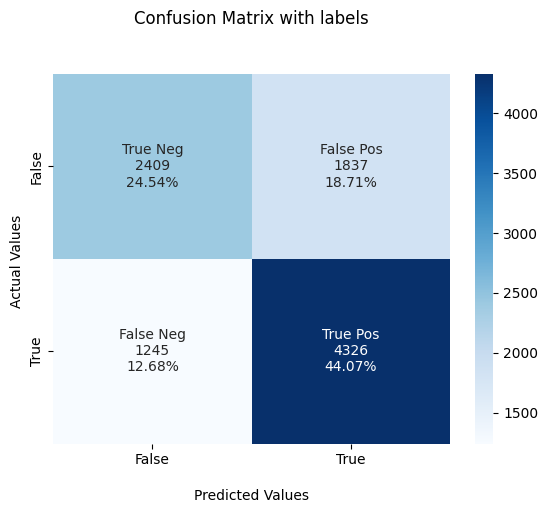

In [935]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

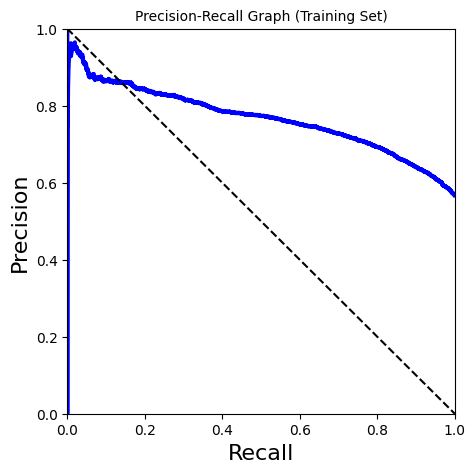

In [936]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:,1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5, 5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

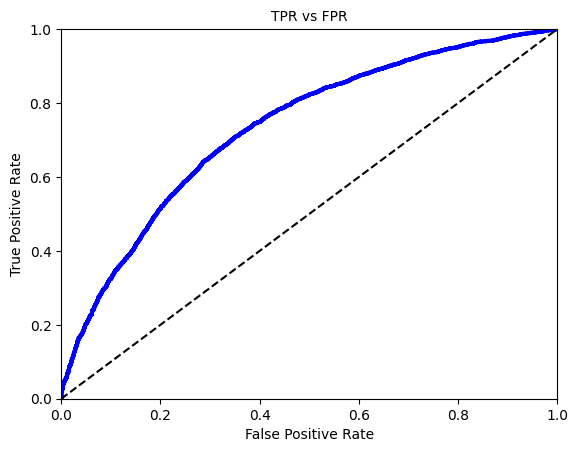

In [937]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [938]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7326


In [939]:
# Use the tuned classifier to predict on test set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.6924
precision = 0.7019
recall    = 0.7765
f1 score  = 0.7373


### 2.4.5.7 Evaluation on Test Set

In [940]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.5381
precision = 0.8231
recall    = 0.2398
f1 score  = 0.3714


## 2.4.6 Logistic Regression Classifier WITH SMOTE Technique

In [941]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

log_reg = make_pipeline(SMOTE(random_state=42), LogisticRegression(random_state = 42))
log_reg.fit(X_train_tr, y_train)
y_pred = log_reg.predict(X_train_tr)

### 2.4.6.1 Accuracy

In [942]:
train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.6845


### 2.4.6.2 Measuring training accuracy using Cross-Validation

In [943]:
k_scores = cross_val_score(log_reg, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.68408188, 0.67603912, 0.67176039])

In [944]:
y_pred_cv = cross_val_predict(log_reg, X_train_tr, y_train, cv=3)

In [945]:
cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2872 1374]
 [1794 3777]]


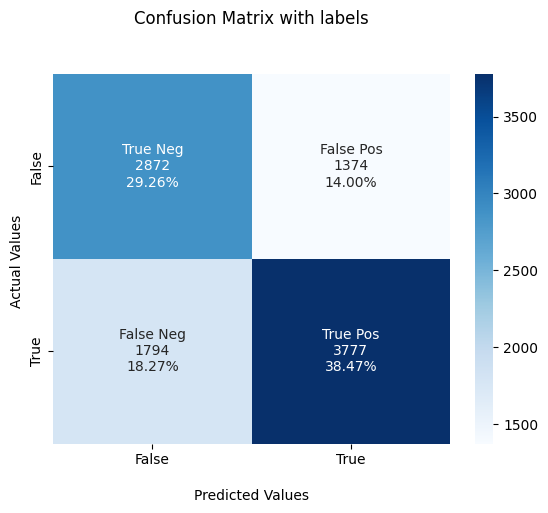

In [946]:
confusionMatrix(cm)

### 2.4.6.3 Precision, Recall and F1 Score

In [947]:
print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.7333
Train recall    = 0.6780
Train f1 score  = 0.7045


### 2.4.6.4 Precision-Recall Curve

In [948]:
y_scores_cv = cross_val_predict(log_reg, X_train_tr, y_train, cv = 3, method="predict_proba")
y_scores_cv = y_scores_cv[:, 1]

y_scores_cv

array([0.46360736, 0.4929905 , 0.60709011, ..., 0.34487034, 0.20251499,
       0.51560703])

In [949]:
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

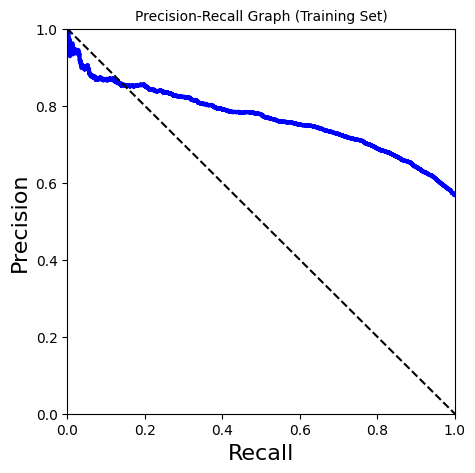

In [950]:
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.6.5 ROC Curve

In [951]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

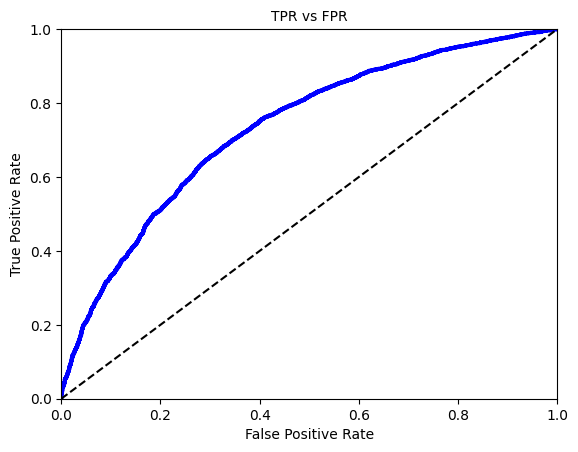

In [952]:
plot_roc_curve(fpr, tpr)

In [953]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.7323


In [954]:
param_grid = {'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'penalty':['l1','l2','elasticnet'], 'C':[100,10,1.0,0.1,0.01]}
new_params = {'logisticregression__' + key: param_grid[key] for key in param_grid}

log_reg = make_pipeline(SMOTE(random_state=42), LogisticRegression(random_state = 42))
grid_search = GridSearchCV(log_reg, new_params, cv =5, scoring = "accuracy")

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

Done


In [955]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


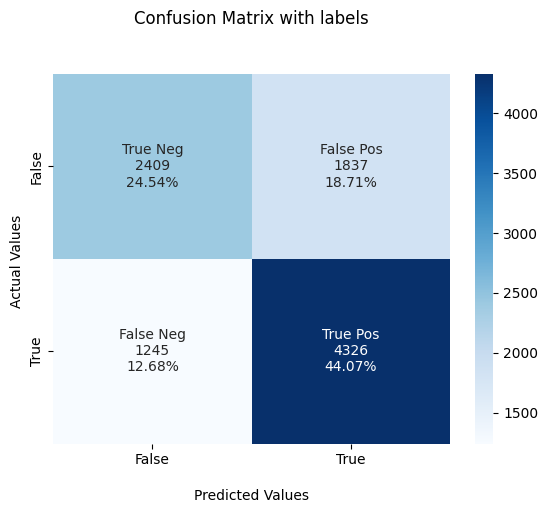

In [956]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

In [957]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=100, penalty='l1', random_state=42,
                                    solver='liblinear'))])

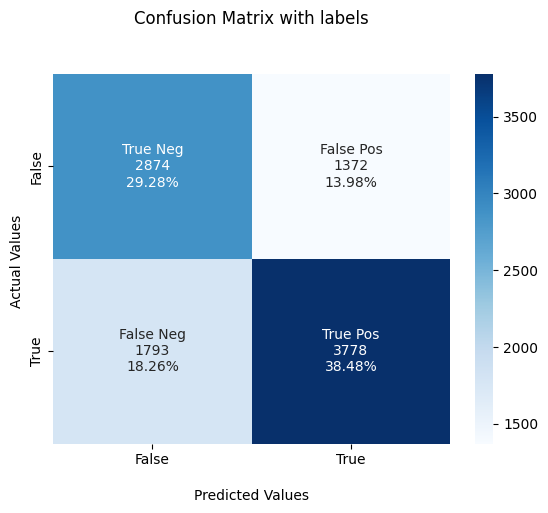

In [958]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

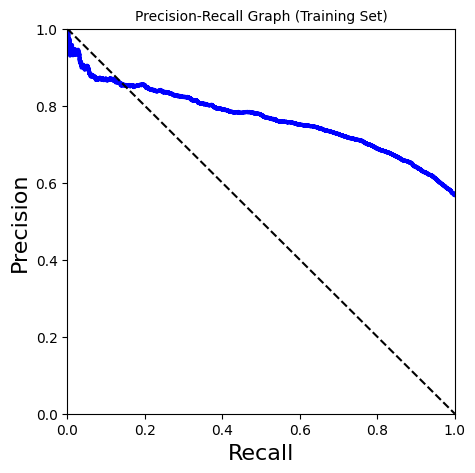

In [959]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:, 1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

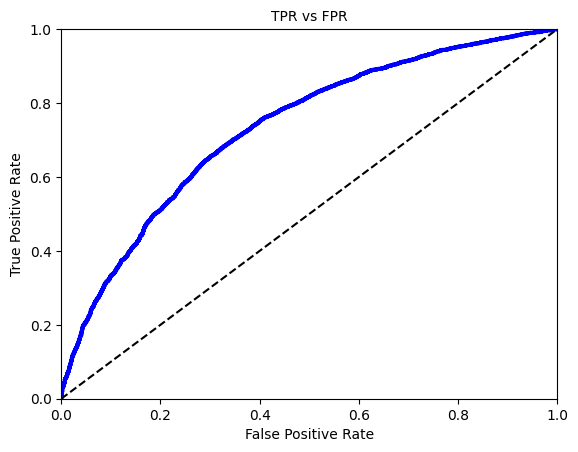

In [960]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [961]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7323


### 2.4.6.6 Fine-tune Logistic Regression using Grid Search

In [962]:
# Use the tuned classifier to predict on train set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.6845
precision = 0.7336
recall    = 0.6782
f1 score  = 0.7048


### 2.4.6.7 Evaluation on Test Set

In [963]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.4574
precision = 0.9221
recall    = 0.0508
f1 score  = 0.0963


In [964]:
attributes = X_train_num.columns.tolist() + list(lb_encoder_gender.classes_) + list(lb_encoder_maritalStatus.classes_) + list(lb_encoder_education.classes_) + list(lb_encoder_income.classes_) + list(lb_encoder_destination.classes_) + list(lb_encoder_passanger.classes_) + list(lb_encoder_weather.classes_) + list(lb_encoder_visitPub.classes_) + list(lb_encoder_visitCoffeeHouse.classes_) + list(lb_encoder_visitFastFood.classes_) + list(lb_encoder_visitFoodCourt.classes_) + list(lb_encoder_visitRestaurant.classes_) + list(lb_encoder_storeType.classes_)
for i,v in enumerate(attributes):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: 0, Score: age
Feature: 1, Score: children
Feature: 2, Score: temperature
Feature: 3, Score: time
Feature: 4, Score: moreThan5km
Feature: 5, Score: moreThan15km
Feature: 6, Score: sameDirection
Feature: 7, Score: Female
Feature: 8, Score: Male
Feature: 9, Score: Divorced
Feature: 10, Score: Married
Feature: 11, Score: Partner
Feature: 12, Score: Single
Feature: 13, Score: Widowed
Feature: 14, Score: Associates degree
Feature: 15, Score: Bachelors degree
Feature: 16, Score: College
Feature: 17, Score: Graduate degree
Feature: 18, Score: High School
Feature: 19, Score: High School Graduate
Feature: 20, Score: $100000 or More
Feature: 21, Score: $12500 - $24999
Feature: 22, Score: $25000 - $37499
Feature: 23, Score: $37500 - $49999
Feature: 24, Score: $50000 - $62499
Feature: 25, Score: $62500 - $74999
Feature: 26, Score: $75000 - $87499
Feature: 27, Score: $87500 - $99999
Feature: 28, Score: Less than $12500
Feature: 29, Score: Home
Feature: 30, Score: Others
Feature: 31, Score: 

Feature: 0, Score: -0.02279
Feature: 1, Score: 0.04272
Feature: 2, Score: -0.03611
Feature: 3, Score: -0.06310
Feature: 4, Score: -0.03378
Feature: 5, Score: 0.07793
Feature: 6, Score: 0.23017
Feature: 7, Score: 0.22195
Feature: 8, Score: -0.00993
Feature: 9, Score: 0.08364
Feature: 10, Score: -0.02198
Feature: 11, Score: 0.25131
Feature: 12, Score: 0.13591
Feature: 13, Score: 0.16792
Feature: 14, Score: -0.07484
Feature: 15, Score: 0.13464
Feature: 16, Score: -0.28878
Feature: 17, Score: 0.67832
Feature: 18, Score: 0.23224
Feature: 19, Score: 0.06814
Feature: 20, Score: -0.04614
Feature: 21, Score: 0.15235
Feature: 22, Score: 0.03420
Feature: 23, Score: 0.20950
Feature: 24, Score: -0.28860
Feature: 25, Score: -0.17516
Feature: 26, Score: -0.32466
Feature: 27, Score: -0.06921
Feature: 28, Score: -0.38338
Feature: 29, Score: 0.32297
Feature: 30, Score: -0.60314
Feature: 31, Score: -0.07036
Feature: 32, Score: -0.43729
Feature: 33, Score: 0.14659
Feature: 34, Score: 0.19573
Feature: 35, 

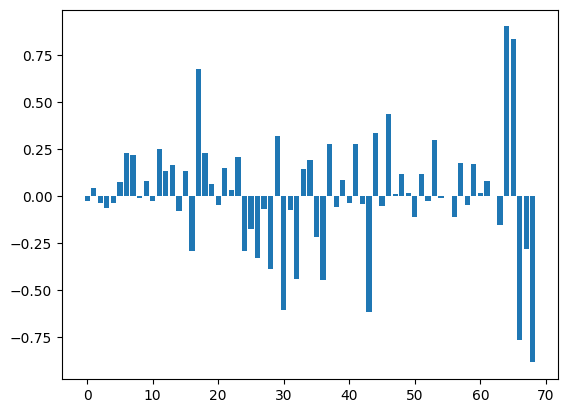

In [965]:
from matplotlib import pyplot
importance = best_model.steps[1][1].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 2.4.7 XGBoost Classifier WITHOUT SMOTE Technique

In [966]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_tr, y_train)
y_pred = xgb_cl.predict(X_train_tr)

### 2.4.7.1 Accuracy

In [967]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9300


### 2.4.7.2 Measuring training accuracy using Cross-Validation

In [968]:
from sklearn.model_selection import cross_val_score

k_scores = cross_val_score(xgb_cl, X_train_tr, y_train, cv=3, scoring = "accuracy")
k_scores

array([0.74243813, 0.75611247, 0.75213936])

In [969]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(xgb_cl, X_train_tr, y_train, cv=3)

In [970]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2876 1370]
 [1082 4489]]


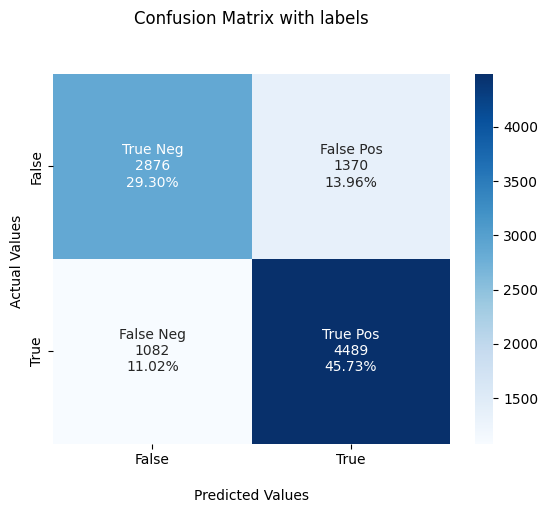

In [971]:
import seaborn as sns

def confusionMatrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

confusionMatrix(cm)

### 2.4.7.3 Precision, Recall and F1 Score

In [972]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision = {:.4f}".format(precision_score(y_train, y_pred_cv)))
print("Recall = {:.4f}".format(recall_score(y_train, y_pred_cv)))
print("f1 score = {:.4f}".format(f1_score(y_train, y_pred_cv)))

Precision = 0.7662
Recall = 0.8058
f1 score = 0.7855


### 2.4.7.4 Precision-Recall Curve

In [973]:
y_scores_cv = cross_val_predict(xgb_cl, X_train_tr, y_train, cv=3, method="predict_proba")
y_scores_cv = y_scores_cv[:,1]

In [974]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

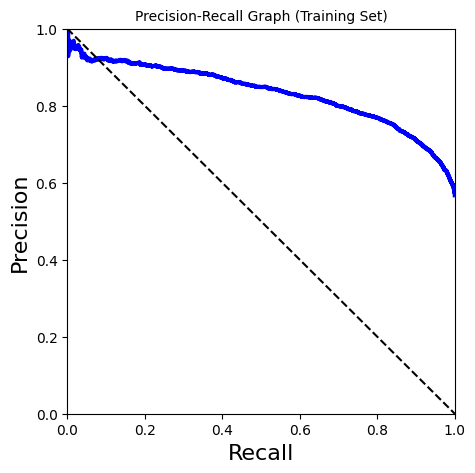

In [975]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.7.5 ROC Curve

In [976]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

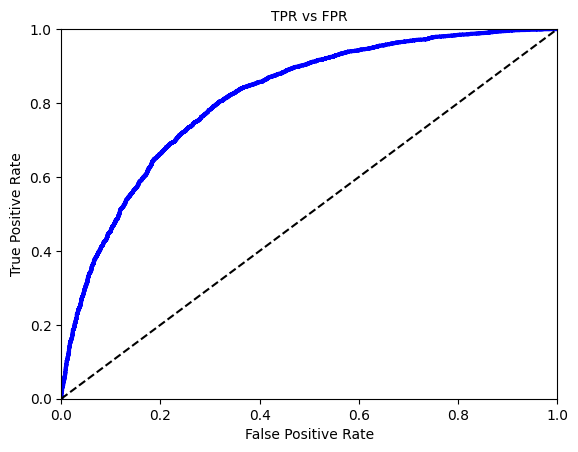

In [977]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=10)
    
plot_roc_curve(fpr, tpr)

In [978]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.8134


### 2.4.7.6 Fine-tune XGBoost using Grid Search

In [979]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25]}
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_search = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

Done


In [980]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5}


In [981]:
best_model = grid_search.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

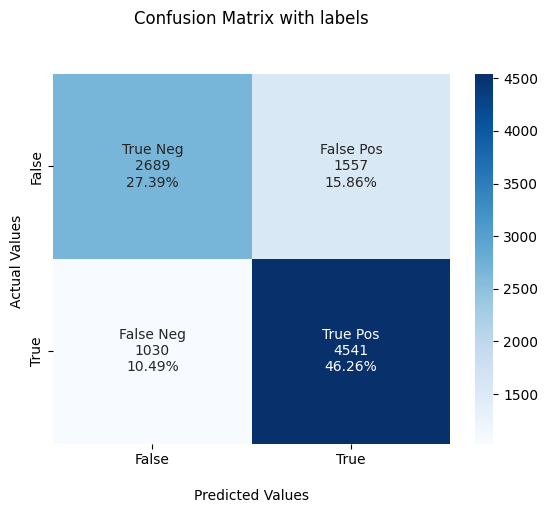

In [982]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

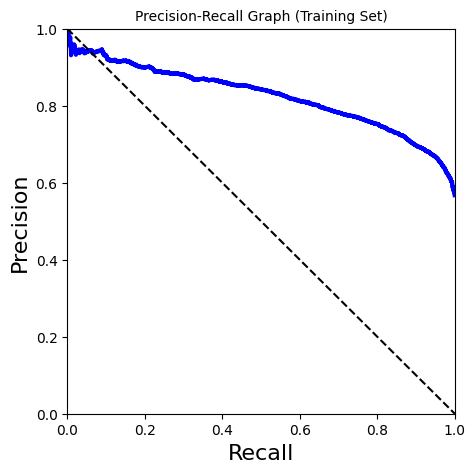

In [983]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:,1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

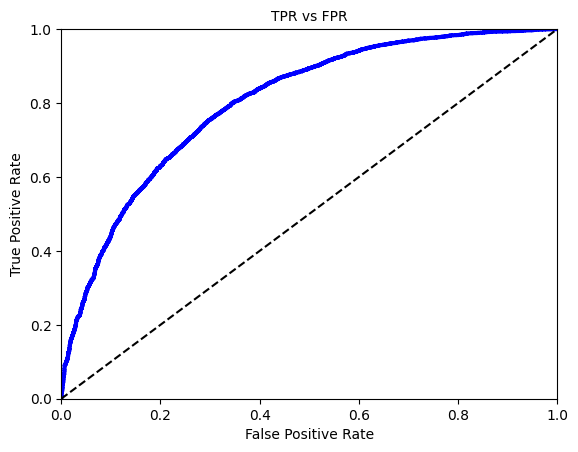

In [984]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [985]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.8019


In [986]:
# Use the tuned classifier to predict on test set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.7997
precision = 0.7447
recall    = 0.8151
f1 score  = 0.7783


### 2.4.7.7 Evaluation on Test Set

In [987]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.6921
precision = 0.7625
recall    = 0.6664
f1 score  = 0.7112


## 2.4.8 XGBoost Classifier WITH SMOTE Technique

#### Training

In [988]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

xgb_cl = make_pipeline(SMOTE(random_state=42), xgb.XGBClassifier())
xgb_cl.fit(X_train_tr, y_train)
y_pred = xgb_cl.predict(X_train_tr)

### 2.4.8.1 Accuracy

In [989]:
train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9138


### 2.4.8.2 Measuring training accuracy using Cross-Validation

In [990]:
k_scores = cross_val_score(xgb_cl, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.75190956, 0.74847188, 0.74358191])

In [991]:
y_pred_cv = cross_val_predict(xgb_cl, X_train_tr, y_train, cv=3)

In [992]:
cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2863 1383]
 [1091 4480]]


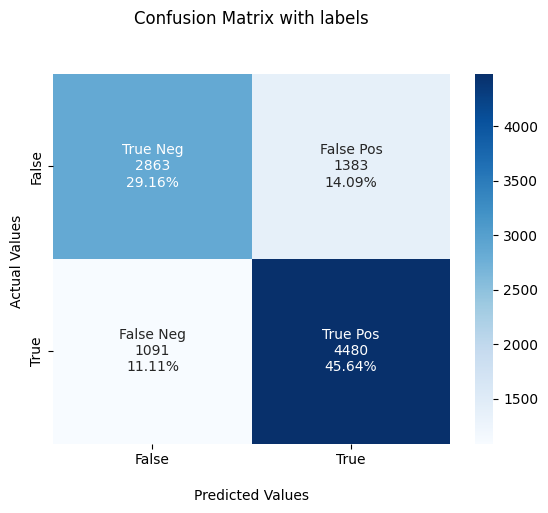

In [993]:
confusionMatrix(cm)

### 2.4.8.3 Precision, Recall and F1 Score

In [994]:
print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.7641
Train recall    = 0.8042
Train f1 score  = 0.7836


### 2.4.8.4 Precision-Recall Curve

In [995]:
y_scores_cv = cross_val_predict(xgb_cl, X_train_tr, y_train, cv = 3, method="predict_proba")
y_scores_cv = y_scores_cv[:, 1]

y_scores_cv

array([0.81964195, 0.1490462 , 0.82821345, ..., 0.23655993, 0.04091156,
       0.12927836], dtype=float32)

In [996]:
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

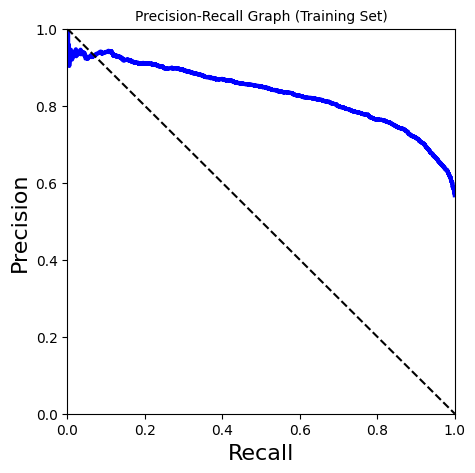

In [997]:
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.8.5 ROC Curve

In [998]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

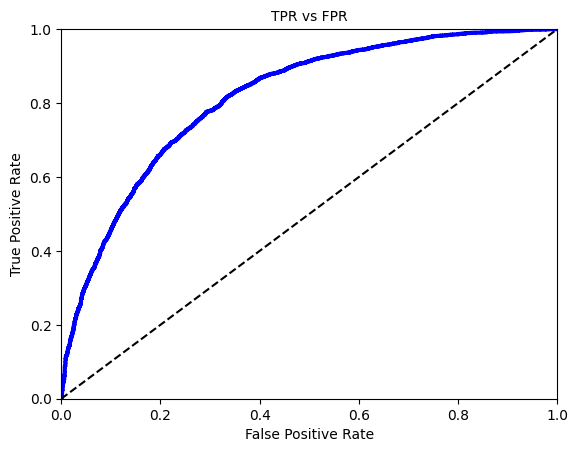

In [999]:
plot_roc_curve(fpr, tpr)

In [1000]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.8142


### 2.4.8.6 Fine-tune XGBoost using Grid Search

In [1001]:
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01],
    "gamma": [0, 0.25]}
new_params = {'xgbclassifier__' + key: param_grid[key] for key in param_grid}

xgb_cl = make_pipeline(SMOTE(random_state=42), xgb.XGBClassifier(objective="binary:logistic"))
grid_search = GridSearchCV(xgb_cl, new_params, n_jobs=-1, cv =5, scoring="accuracy")

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... 

Done


In [1002]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5}


In [1003]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

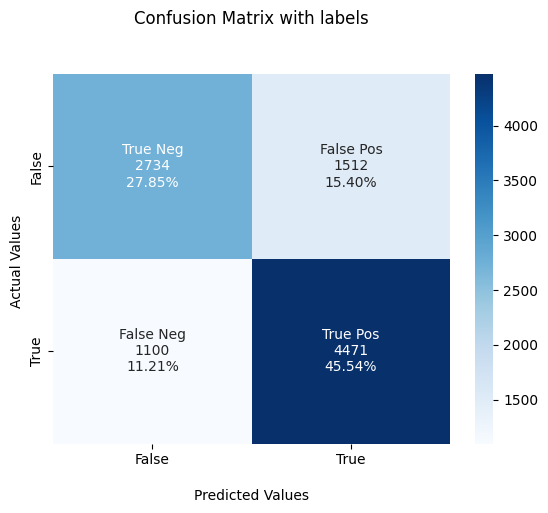

In [1004]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

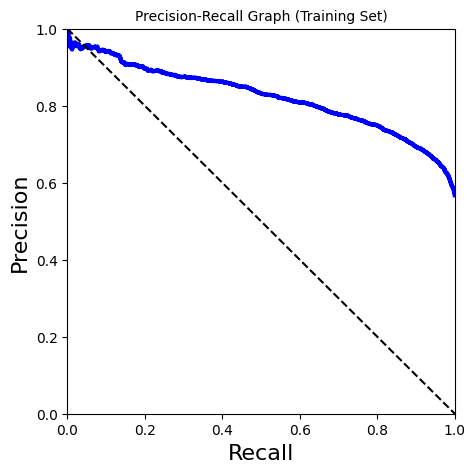

In [1005]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:, 1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

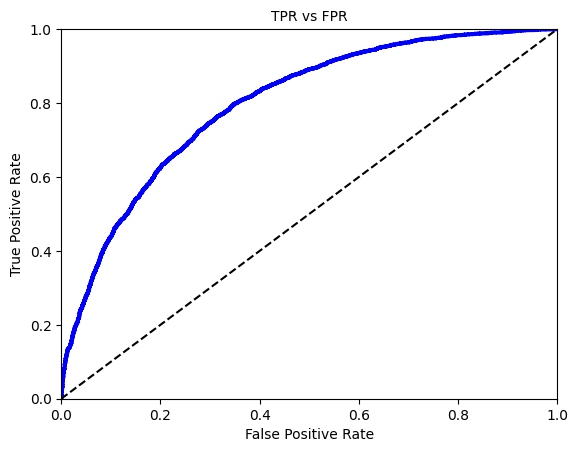

In [1006]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [1007]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7973


In [1008]:
# Use the tuned classifier to predict on train set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.7826
precision = 0.7473
recall    = 0.8025
f1 score  = 0.7739


### 2.4.8.7 Evaluation on Test Set

#### Use the best model to predict on test set

In [1009]:

y_pred_tuned = best_model.predict(X_test_tr)


#### Compute and print the precision, recall, f1 score of the prediction

In [1010]:
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.6057
precision = 0.8315
recall    = 0.3851
f1 score  = 0.5264


In [1011]:
feature_importances = best_model.steps[1][1].feature_importances_
attributes = X_train_num.columns.tolist() + list(lb_encoder_gender.classes_) + list(lb_encoder_maritalStatus.classes_) + list(lb_encoder_education.classes_) + list(lb_encoder_income.classes_) + list(lb_encoder_destination.classes_) + list(lb_encoder_passanger.classes_) + list(lb_encoder_weather.classes_) + list(lb_encoder_visitPub.classes_) + list(lb_encoder_visitCoffeeHouse.classes_) + list(lb_encoder_visitFastFood.classes_) + list(lb_encoder_visitFoodCourt.classes_) + list(lb_encoder_visitRestaurant.classes_) + list(lb_encoder_storeType.classes_)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.06467812, 'Fast Food'),
 (0.048604798, 'moreThan15km'),
 (0.045122515, 'Coffee House'),
 (0.04489825, 'very often'),
 (0.043544583, 'Restaurant'),
 (0.03615129, 'Home'),
 (0.03469813, 'Sunny'),
 (0.03242768, 'Food Court'),
 (0.026148899, 'Family'),
 (0.023614313, 'very often'),
 (0.023436604, 'rarely'),
 (0.020194165, 'often'),
 (0.018706854, 'Female'),
 (0.018509084, 'Snowy'),
 (0.01716596, 'Partner'),
 (0.015976595, 'sameDirection'),
 (0.014582444, 'moreThan5km'),
 (0.013777537, 'Associates degree'),
 (0.013740936, '$75000 - $87499'),
 (0.013339019, 'often'),
 (0.012718675, 'often'),
 (0.012656288, 'time'),
 (0.012175999, 'Work'),
 (0.011785404, 'rarely'),
 (0.011353342, 'Married'),
 (0.011195325, '$12500 - $24999'),
 (0.011164372, '$37500 - $49999'),
 (0.010820065, 'College'),
 (0.010753708, 'sometimes'),
 (0.010636956, 'Divorced'),
 (0.010366025, 'rarely'),
 (0.010322213, 'Partner'),
 (0.010261163, 'rarely'),
 (0.010211188, '$100000 or More'),
 (0.010085096, 'Alone'),
 (0.01005

## 2.4.9 K-Nearest Neighbour WITHOUT SMOTE Technique

#### Training

In [1012]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tr, y_train)
y_pred = knn.predict(X_train_tr)

### 2.4.9.1 Accuracy

In [1013]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.8288


### 2.4.9.2 Measuring training accuracy using Cross-Validation

In [1014]:
from sklearn.model_selection import cross_val_score

k_scores = cross_val_score(knn, X_train_tr, y_train, cv=3, scoring = "accuracy")
k_scores

array([0.6568897 , 0.64333741, 0.64486553])

In [1015]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(knn, X_train_tr, y_train, cv=3)

In [1016]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2417 1829]
 [1623 3948]]


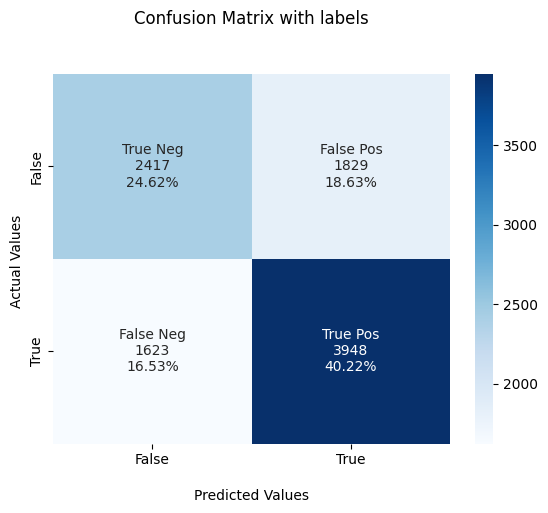

In [1017]:
import seaborn as sns

def confusionMatrix(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

confusionMatrix(cm)

### 2.4.9.3 Precision, Recall and F1 Score

In [1018]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision = {:.4f}".format(precision_score(y_train, y_pred_cv)))
print("Recall = {:.4f}".format(recall_score(y_train, y_pred_cv)))
print("f1 score = {:.4f}".format(f1_score(y_train, y_pred_cv)))

Precision = 0.6834
Recall = 0.7087
f1 score = 0.6958


### 2.4.9.4 Precision-Recall Curve

In [1019]:
y_scores_cv = cross_val_predict(knn, X_train_tr, y_train, cv=3, method="predict_proba")
y_scores_cv = y_scores_cv[:,1]

In [1020]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

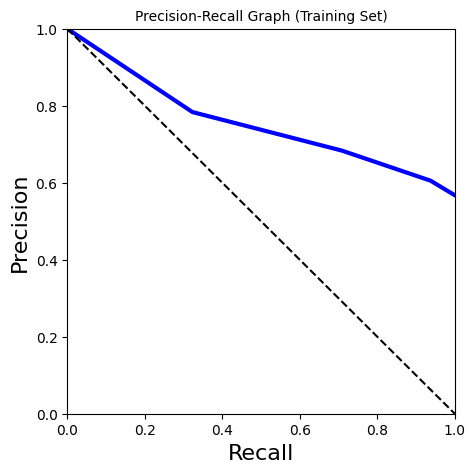

In [1021]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.9.5 ROC Curve

In [1022]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

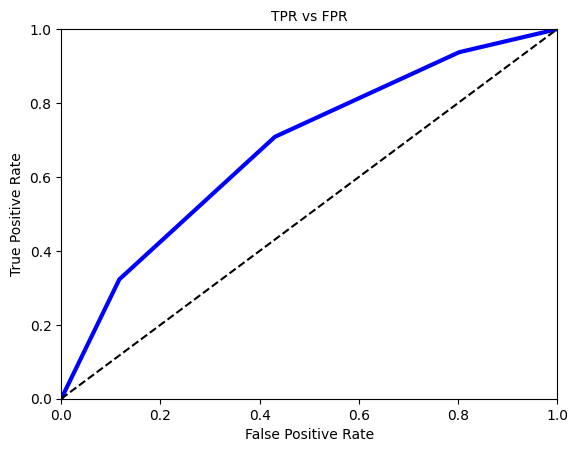

In [1023]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=10)
    
plot_roc_curve(fpr, tpr)

In [1024]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.6781


### 2.4.9.6 Fine-tune KNN using Grid Search

In [1025]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9]}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, grid_params, cv=5, scoring="accuracy")

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... Done


In [1026]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'n_neighbors': 9}


In [1027]:
best_model = grid_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=9)

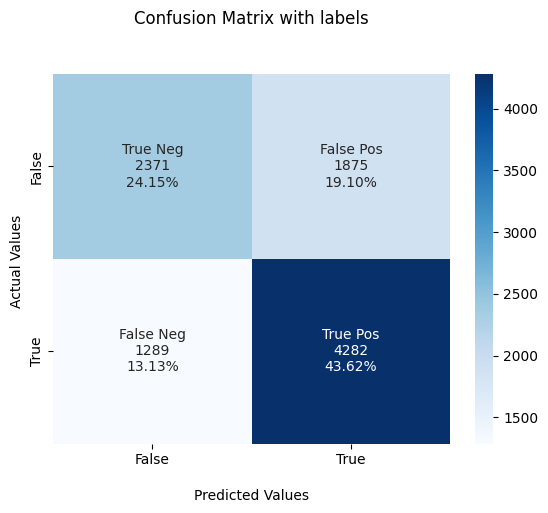

In [1028]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

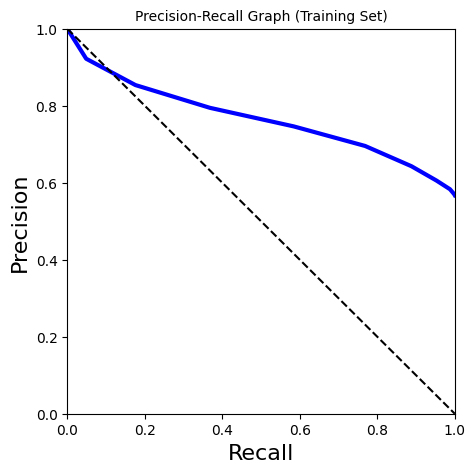

In [1029]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:,1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

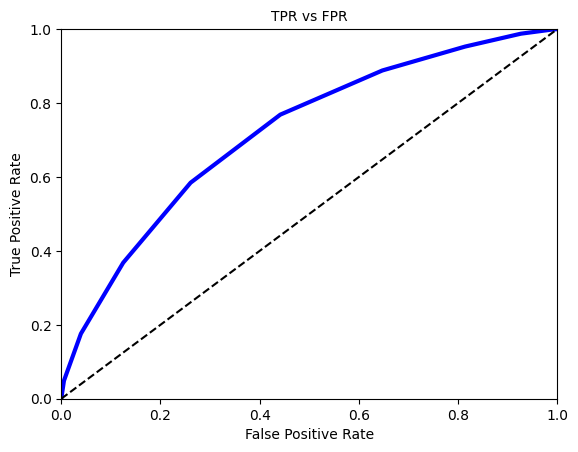

In [1030]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [1031]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7203


In [1032]:
# Use the tuned classifier to predict on test set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_tuned)))

Accuracy  = 0.7656
precision = 0.7695
recall    = 0.8379
f1 score  = 0.8023


### 2.4.9.7 Evaluation on Test Set

In [1033]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.5145
precision = 0.6450
recall    = 0.3264
f1 score  = 0.4335


## 2.4.10 K-Nearest Neighbout WITH SMOTE Technique

In [1034]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

knn = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train_tr, y_train)
y_pred = knn.predict(X_train_tr)

### 2.4.10.1 Accuracy

In [1035]:
train_acc = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.8309


### 2.4.10.2 Measuring training accuracy using Cross-Validation

In [1036]:
k_scores = cross_val_score(knn, X_train_tr, y_train, cv = 3, scoring='accuracy')
k_scores

array([0.6355026 , 0.62622249, 0.63294621])

In [1037]:
y_pred_cv = cross_val_predict(knn, X_train_tr, y_train, cv=3)

In [1038]:
cm = confusion_matrix(y_train, y_pred_cv)
print(cm)

[[2741 1505]
 [2112 3459]]


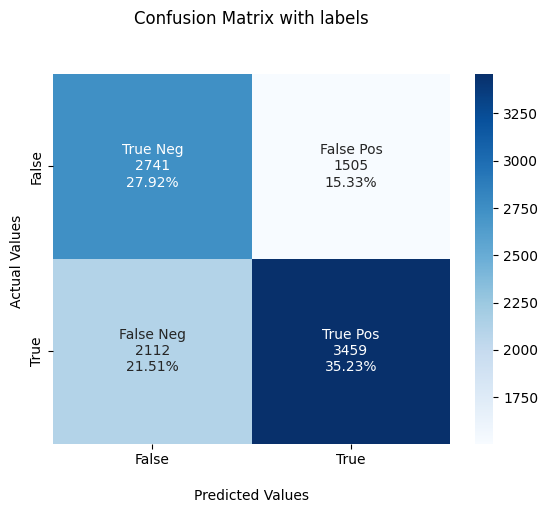

In [1039]:
confusionMatrix(cm)

### 2.4.10.3 Precision, Recall and F1 Score

In [1040]:
print('Train precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('Train recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv)))
print('Train f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

Train precision = 0.6968
Train recall    = 0.6209
Train f1 score  = 0.6567


### 2.4.10.4 Precision-Recall Curve

In [1041]:
y_scores_cv = cross_val_predict(knn , X_train_tr, y_train, cv = 3, method="predict_proba")
y_scores_cv = y_scores_cv[:, 1]

y_scores_cv

array([0.66666667, 0.33333333, 0.66666667, ..., 0.33333333, 0.33333333,
       0.66666667])

In [1042]:
precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv)

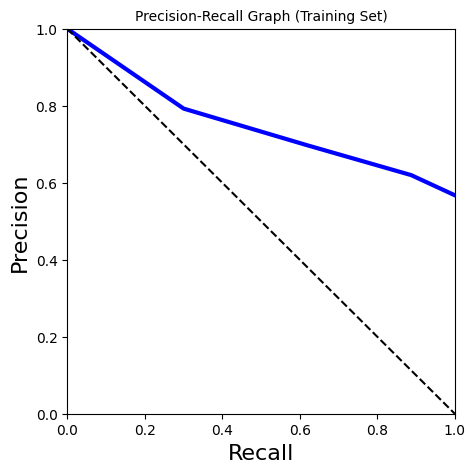

In [1043]:
plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

### 2.4.10.5 ROC Curve

In [1044]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

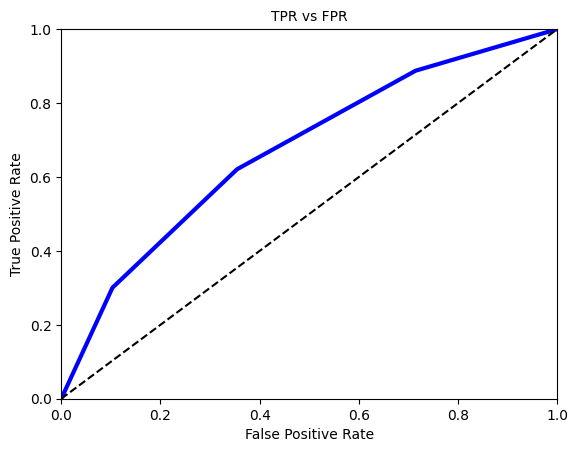

In [1045]:
plot_roc_curve(fpr, tpr)

In [1046]:
auc = roc_auc_score(y_train, y_scores_cv)
print('AUC = {:.4f}'.format(auc))

AUC = 0.6722


### 2.4.10.6 Fine-tune KNN using Grid Search

In [1047]:
param_grid = {'kneighborsclassifier__n_neighbors' : [5,7,9]}

knn = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier())
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... Done


In [1048]:
print('Best hyperparameter settings:', grid_search.best_params_)

Best hyperparameter settings: {'kneighborsclassifier__n_neighbors': 9}


In [1049]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

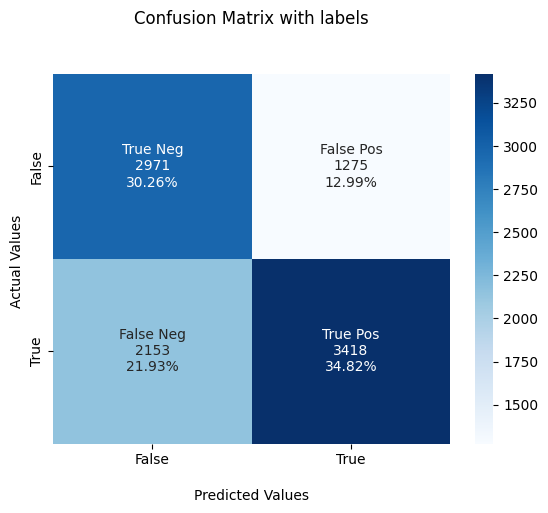

In [1050]:
y_pred_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3)

cm_tuned = confusion_matrix(y_train, y_pred_cv_tuned)
confusionMatrix(cm_tuned)

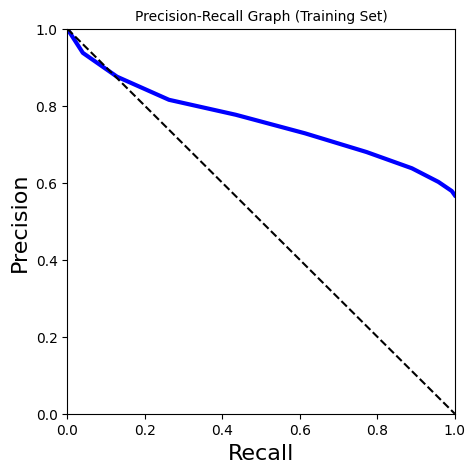

In [1051]:
y_scores_cv_tuned = cross_val_predict(best_model , X_train_tr, y_train, cv = 3, method = 'predict_proba')
y_scores_cv_tuned = y_scores_cv_tuned[:, 1]

precisions, recalls, threholds = precision_recall_curve(y_train, y_scores_cv_tuned)

plt.figure(figsize=(5,5))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 10)
plt.show()

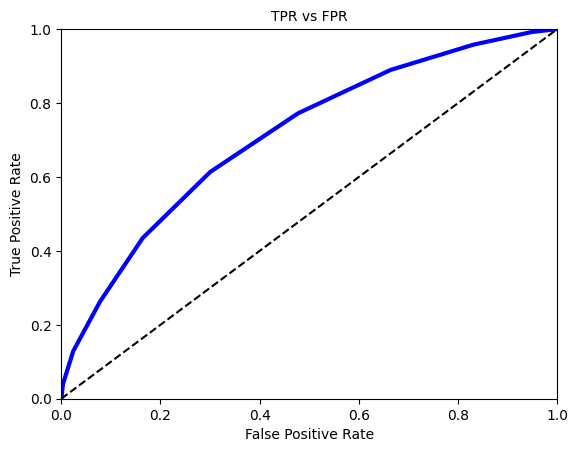

In [1052]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv_tuned)

plot_roc_curve(fpr, tpr)

In [1053]:
auc_tuned = roc_auc_score(y_train, y_scores_cv_tuned)
print('AUC = {:.4f}'.format(auc_tuned))

AUC = 0.7116


In [1054]:
# Use the tuned classifier to predict on train set
y_pred_tuned = best_model.predict(X_train_tr)

# compute and print the precision, recall, f1 score of the prediction
train_acc = accuracy_score(y_train, y_pred_tuned)
print("Accuracy  = {:.4f}".format(train_acc))
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_train, y_pred_cv_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_pred_cv_tuned)))

Accuracy  = 0.7557
precision = 0.7283
recall    = 0.6135
f1 score  = 0.6660


### 2.4.10.7 Evaluation on Test Set

In [1055]:
# Use the best model to predict on test set
y_pred_tuned = best_model.predict(X_test_tr)

# compute and print the precision, recall, f1 score of the prediction
test_acc = accuracy_score(y_test, y_pred_tuned)
print("Accuracy  = {:.4f}".format(test_acc))
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_tuned)))
print('recall    = {:.4f}'.format(recall_score(y_test, y_pred_tuned)))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_tuned)))

Accuracy  = 0.4965
precision = 0.6305
recall    = 0.2785
f1 score  = 0.3863
